In [2]:
# Análisis Exploratorio y Preprocesamiento de Datos
# Grupo 23
# Integrantes: Martin Laurito, Lucas Franciulli, Dante Alejandro Finci

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from google.colab import drive

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#drive.mount('/content/drive')
ds_hotels = pd.read_csv("./hotels_train.csv")
#ds_hotels = pd.read_csv("./drive/MyDrive/datasets/hotels_train.csv")
ds = ds_hotels.copy() 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Se va porque ya no esta reservation_status
ds.drop(columns="reservation_status_date", inplace=True)

In [3]:
def agent_a_string(value):
    return str(value)
ds_hotels["agent"] = ds_hotels["agent"].apply(agent_a_string)

In [7]:
ds.agent.value_counts()/len(ds)*100

9.0      27.464345
240.0    11.929643
1.0       7.145511
14.0      2.745788
6.0       2.647263
7.0       2.553583
250.0     2.174018
241.0     1.243681
3.0       1.193610
8.0       1.182304
37.0      1.172613
28.0      1.124158
19.0      1.069242
21.0      0.883498
40.0      0.734902
314.0     0.725211
229.0     0.723596
29.0      0.679986
242.0     0.626686
12.0      0.539467
20.0      0.529776
83.0      0.526545
171.0     0.481321
96.0      0.478090
134.0     0.466784
85.0      0.428020
298.0     0.407023
30.0      0.405408
56.0      0.390871
243.0     0.368259
26.0      0.348877
58.0      0.347261
27.0      0.332725
11.0      0.332725
86.0      0.313343
15.0      0.308497
44.0      0.293961
5.0       0.289115
119.0     0.285885
236.0     0.281040
273.0     0.269733
34.0      0.266503
177.0     0.264888
22.0      0.255197
38.0      0.239045
196.0     0.237430
68.0      0.227739
315.0     0.222893
10.0      0.218048
17.0      0.216433
154.0     0.197051
138.0     0.195436
191.0     0.

In [5]:
ds[ds.duplicated(["id"], keep=False)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

# **Analisis inicial**

# Observaciones:
*  La variable company tiene una gran cantidad de datos faltantes y poca correlacion con el target porque le podriamos removerla.
 Si se decide mantenerla podriamos de float a string para que se pueda trabajar sobre ella como una variable cualitativa.

*  Hay varias variables como previous_cancellations y adults donde hat muchos valores "outlier" que estan muy lejos de la norma y aparecen muy escasamente por lo que quizas habria que discretarlas.

*  Las filas con adults=0 parecerian ser errores 


In [6]:
# Tipo de variables
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [7]:
ds.tail()

hotel  lead_time  arrival_date_year arrival_date_month  \
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
61908                        0                     2       2       0.0   
61909                        0                     1       1       0.0   
61910                        1                     2       1       0.0   
61911                        2                     5       2       0.0   
61912                        2                     5       2       0.0   

       babies meal country market_segment distribution_channel  \
61908       0   BB     ESP      Online TA                TA/TO   
61909       0   SC     FRA      Online TA                TA/TO   
61910       0   BB     FRA       Aviation            Corporate   
61911       0   BB     PRT         Groups                TA/TO   
61912       0   HB     ISR      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
61908                  0                       0   
61909                  0                       0   
61910                  0                       0   
61911                  0                       0   
61912                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
61908                               0                  A                  D   
61909                               0                  A                  A   
61910                               0                  A                  A   
61911                               0                  A                  A   
61912                               0                  D                  D   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
61908                0   No Deposit  240.0      NaN                     0   
61909                0   No Deposit    NaN      NaN                     0   
61910                0   No Deposit    NaN    153.0                     0   
61911                0   Non Refund   96.0      NaN                     0   
61912                1   No Deposit    9.0      NaN                     0   

      customer_type     adr  required_car_parking_spaces  \
61908     Transient   48.00                            0   
61909     Transient  149.00                            0   
61910     Transient   95.00                            0   
61911     Transient   36.05                            0   
61912     Transient  143.29                            0   

       total_of_special_requests                                    id  \
61908                          1  32bffef5-5404-4e86-9f39-fd2282e1ad7f   
61909                          0  cc922a1c-356e-42a5-a984-0b1af03c2f5c   
61910                          0  76fb0e83-59df-43ee-9c33-aec51030ed45   
61911                          0  01906859-1094-4e37-b13e-b015b594d159   
61912                          0  7137e599-4442-41fb-b147-4aba9f344e38   

       is_canceled  
61908            1  
61909            0  
61910            0  
61911            1  
61912            1

In [8]:
ds.deposit_type.value_counts()/len(ds)*100

No Deposit    83.480045
Non Refund    16.393972
Refundable     0.125983
Name: deposit_type, dtype: float64

# Variables Cuantitativas:
* lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, 
previous_bookings_not_canceled, booking_changes, agent, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, is_canceled

# Variables Cualitativas: 
* hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, company, customer_type, id	


In [8]:
# Variables Cuantitativas: calculo medidas de resumen
var_cuant = ["lead_time", "arrival_date_year", "arrival_date_week_number", 
"arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", 
"children", "babies", "is_repeated_guest", "previous_cancellations", 
"previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", 
"required_car_parking_spaces", "total_of_special_requests", "is_canceled"]

def describir(array):
    for var in array:
      display(ds[var].describe())
describir(var_cuant)

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

count    61913.000000
mean      2016.154749
std          0.708389
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

count    61913.00000
mean        27.21808
std         13.52601
min          1.00000
25%         16.00000
50%         28.00000
75%         38.00000
max         53.00000
Name: arrival_date_week_number, dtype: float64

count    61913.000000
mean        15.785812
std          8.795489
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

count    61913.000000
mean         0.924135
std          0.993101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

count    61913.000000
mean         1.862791
std          0.589066
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

count    61909.000000
mean         0.104896
std          0.402847
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

count    61913.000000
mean         0.007155
std          0.092158
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

count    61913.000000
mean         0.027991
std          0.164948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64

count    61913.000000
mean         0.114790
std          0.993723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

count    61913.000000
mean         0.115420
std          1.396359
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

count    61913.000000
mean         0.195952
std          0.610519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

count    61913.000000
mean         2.638977
std         18.619092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

count    61913.000000
mean         0.049957
std          0.221023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

count    61913.000000
mean         0.523703
std          0.775412
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

count    61913.000000
mean         0.499750
std          0.500004
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [6]:
# Variables Cualitativas: reporte de los posibles valores que toman y cuán
# frecuentemente lo hacen.
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "company", 
"customer_type", "id"]
def conteo_de_valores(array):
    for var in array:
        display(ds[var].value_counts())
conteo_de_valores(var_cual)

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
ROU      246
AUS      217
AGO      200
DNK      197
FIN      191
LUX      150
MAR      135
TUR      134
HUN      122
ARG      106
JPN       83
KOR       80
CZE       77
IND       71
GRC       60
ZAF       57
HRV       50
MEX       45
COL       44
DZA       42
IRN       39
LTU       37
BGR       36
CHL       36
EST       36
UKR       34
SRB       33
SVK       33
ARE       33
NZL       33
SAU       32
THA       32
MOZ       28
SVN       28
CYP       27
LVA       26
PHL       25
ISL       24
IDN       24
TWN       23
HKG       22
SGP       22
EGY       20
TUN       19
NGA       19
URY       16
GEO       15
MYS       14
LBN       14
AZE       13
CPV       13
BLR       13
MAC       12
KWT       12
VEN       12
JOR       11
PAK       11

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
174.0     73
281.0     69
219.0     66
51.0      53
405.0     49
154.0     47
233.0     45
94.0      43
348.0     38
169.0     35
47.0      34
197.0     34
135.0     31
242.0     28
498.0     28
68.0      28
110.0     27
331.0     26
280.0     26
38.0      26
270.0     26
202.0     26
342.0     24
218.0     22
91.0      20
20.0      20
195.0     20
43.0      20
308.0     20
62.0      19
385.0     18
307.0     16
204.0     15
227.0     15
238.0     15
9.0       14
407.0     14
365.0     14
72.0      14
122.0     13
221.0     13
179.0     13
148.0     13
507.0     12
209.0     12
86.0      12
477.0     12
418.0     12
113.0     11
286.0     11
424.0     11
143.0     11
46.0      10
216.0     10
366.0     10
144.0     10
178.0     10
251.0     10
292.0     10
343.0      9
78.0       9
268.0      9
269.0      9
523.0      8
163.0      8
346.0      8
337.0      8
81.0       8
112.0      8
150.0      8
408.0      7
88.0       7

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

7aa4cc6b-b92c-4061-b21d-4f9e0cac4689    1
4782fe38-2edf-48df-8a73-ff1df6150941    1
63068df5-6476-4d01-aa22-940eda3382eb    1
b442e553-c108-440f-8bf4-3a79d45e716c    1
c8e19318-10f5-4f61-a637-99ee6ae623c3    1
2819ef6e-f93e-4410-b27e-07dbc2209500    1
c1b8c0bb-61d4-4f3f-a903-69abfcda6319    1
183832a6-d511-41c6-8f87-0ca76535d0e0    1
5922535a-4381-439d-af2f-d1738ff0829d    1
03491363-8a60-4c58-a50c-45a3410c9246    1
9d703003-6cff-449c-b040-04cfd9b0761d    1
af68de92-0d5b-4487-91eb-480182bdaa13    1
d0f149c3-1421-42ab-afd3-c958b7e009b6    1
4e4d5ebe-174d-4059-99be-ab9c08d45905    1
c59b165a-1f08-42f3-b816-9b2c9566d1ce    1
3fa600ec-9d93-4a75-8e71-0c2efc149f32    1
35626327-cfd9-4bcc-8d96-83b0e661ad31    1
e9413f4d-df08-4023-9388-49620bb14253    1
637c442d-86c1-4736-95c6-da8a98bfbd8d    1
469da32f-1a48-4e8d-a701-0d881bc0398e    1
71aadb4f-693e-4983-828c-e11a37dd096d    1
3c04a03c-1e63-4f00-a8c0-c8924e88f98e    1
fd3e75e7-98e5-42ef-9e3c-0989516bc14d    1
b6a244ec-7170-4a24-aea7-edaec6b6f5

In [11]:
display(ds.columns)

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

# **Variables irrelevantes para el análisis**

Existen diversas variables que no nos aportan informacion importante a nuestro analisis. Entre ellas se encuentran:

  ***is_canceled*** y ***id***: Son distintas para cada huesped por lo que no hay ningún análisis que pueda derivar de ellas.

A continuacion vamos a analizar las variables *distribution_channel* y *required_car_parking_spaces* para concluir si son irrelevantes o no.


En el proximo grafico vamos a ver la distribucion de los posibles valores que toma *distribution_channel*



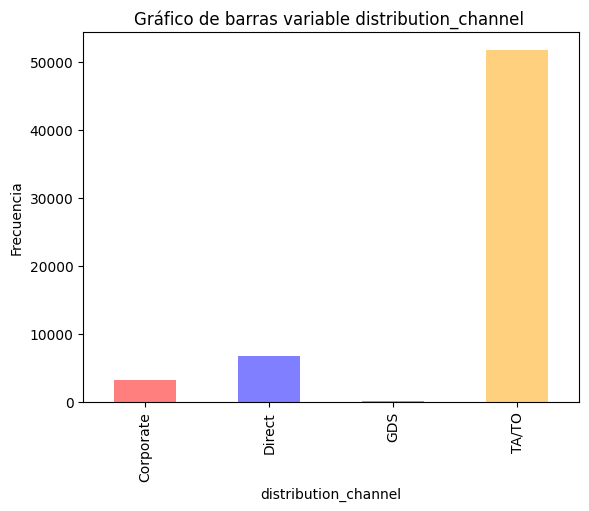

In [10]:
# Analisis de distribution_channel
colores=["red","blue", "green", "orange", "purple"]
nuevo_ds_temporal = ds['distribution_channel'].value_counts().drop("Undefined")
f=nuevo_ds_temporal.sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable distribution_channel ", xlabel="distribution_channel",ylabel="Frecuencia") 

Como podemos observar la inmensa mayoria de posibles variables que toma la columna de *distribution_channel* son **TA/TO**. 
En el proximo grafico veremos la el porcentaje de cada posible valor de distribution_channel que cancelo su reversa.

distribution_channel
Corporate    32.692308
Direct       25.930284
GDS          29.213483
TA/TO        54.217053
Name: is_canceled, dtype: float64


(0.0, 100.0)

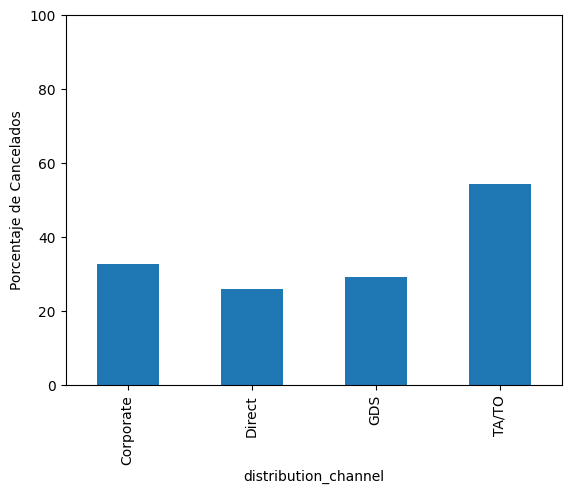

In [13]:
serie_sin_undefined = ds[ds['distribution_channel'] != 'Undefined']
cantidad_cancelados = serie_sin_undefined.groupby('distribution_channel')['is_canceled'].mean()*100
print(cantidad_cancelados)
relacion_channel_cancelados = cantidad_cancelados.plot(kind='bar')
relacion_channel_cancelados.set_xlabel('distribution_channel')
relacion_channel_cancelados.set_ylabel('Porcentaje de Cancelados')
relacion_channel_cancelados.set_ylim(0, 100)

Como podemos observar la variable **TA/TO** (que recordemos que representa al *83.8%* de los *distribution_channel*) cancelo las reservas un *54.21%* de las veces. Por ende esta columna nos proporciona informacion relevante.

A continuacion vamos analizar el caso de *required_car_parking_spaces*

0    58841
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64
Porcentaje de valores que toman el 0:  95.03819876278003


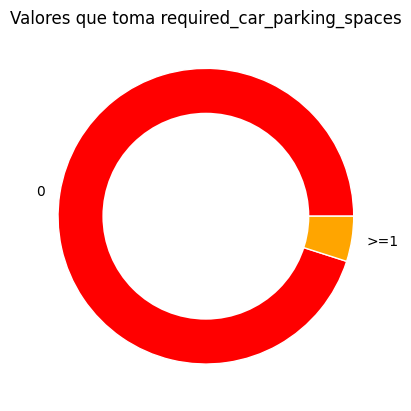

In [14]:
nuevo_ds_temporal = ds['required_car_parking_spaces'].value_counts()
print(nuevo_ds_temporal)
nuevo_ds_temporal = ds['required_car_parking_spaces'].value_counts().drop(8).drop(3).drop(2)
labels = ['0', '>=1']
colors = ['red', 'orange']
plt.pie(nuevo_ds_temporal, labels=labels, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Valores que toma required_car_parking_spaces')
print("Porcentaje de valores que toman el 0: ",(nuevo_ds_temporal[0]*100)/61913)

Como podemos observar, el porcentaje de valores que toman el 0 es del 95.03%. Minetras que el restante 4.97% toma un valor mayor o igual a 1. Ahora observemos que valores de *is_canceled* toma cada uno.

required_car_parking_spaces
0    52.584083
1     0.000000
2     0.000000
3     0.000000
8     0.000000
Name: is_canceled, dtype: float64


(0.0, 100.0)

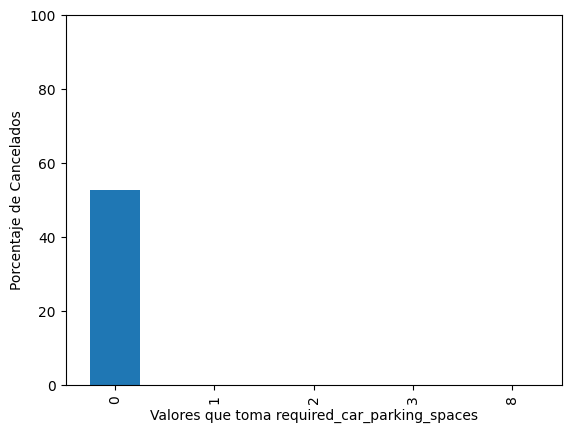

In [15]:
serie_requered_car_parking_spaces = ds.groupby('required_car_parking_spaces')['is_canceled'].mean()*100
print(serie_requered_car_parking_spaces)
relacion_channel_cancelados = serie_requered_car_parking_spaces.plot(kind='bar')
relacion_channel_cancelados.set_xlabel('Valores que toma required_car_parking_spaces')
relacion_channel_cancelados.set_ylabel('Porcentaje de Cancelados')
relacion_channel_cancelados.set_ylim(0, 100)

De los graficos anteriores podemos llegar a la conclusion de que si la variable *required_car_parking_spaces* toma un valores diferente a 0 este NO cancela su reserva, en cambio en el caso contrario tiene un 52.58% de chances de hacerlo. Por lo tanto concluimos que la variable *required_car_parking_spaces* es necesaria para el analisis

# Análisis gráfico de las distribuciones de algunas de las variables mas representativas

Variable: *is_canceled*

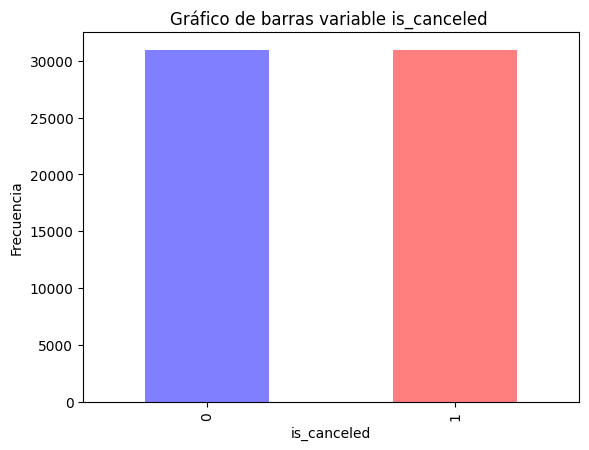

In [15]:
# análisis gráfico de las distribuciones de algunas de las variables mas 
grf=ds['is_canceled'].value_counts().sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable is_canceled ", xlabel="is_canceled",ylabel="Frecuencia") 

Variable: *is_repeated_guest*

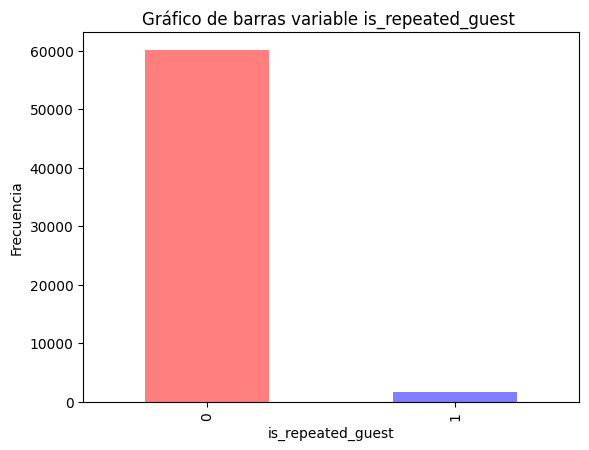

In [36]:

grf=ds['is_repeated_guest'].value_counts().sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable is_repeated_guest ", xlabel="is_repeated_guest",ylabel="Frecuencia") 

Variable: *previous_cancellations*

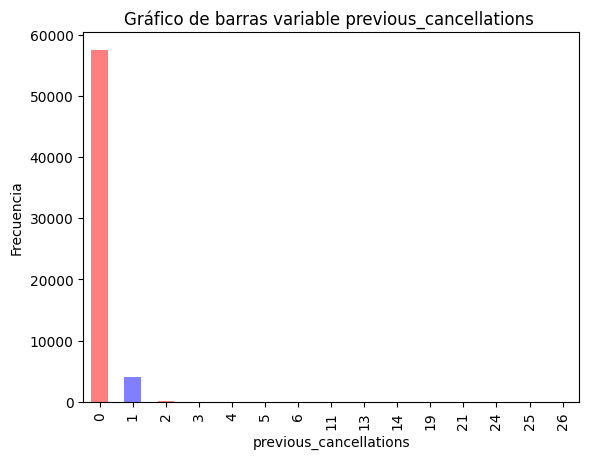

In [14]:
#aca trate de hacer un pie chart con seaborn y me exploto la pc
grf=ds['previous_cancellations'].value_counts().sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable previous_cancellations ", xlabel="previous_cancellations",ylabel="Frecuencia") 

Variable: *previous_bookings_not_canceled*

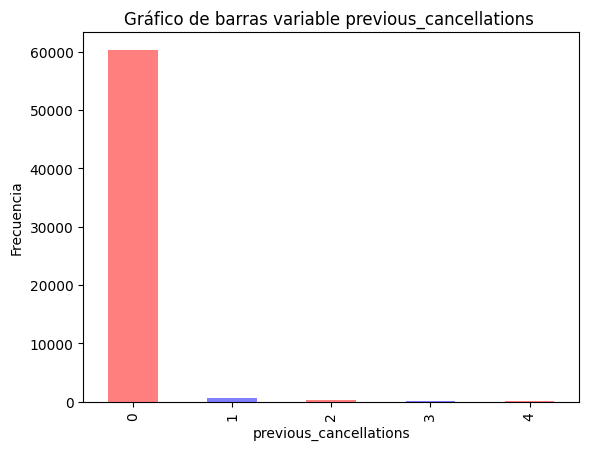

In [19]:
#acoto a los valores mas representativos para darle mas claridad al grafico
rf=ds["previous_bookings_not_canceled"][ds['previous_bookings_not_canceled'] < 5].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable previous_cancellations ", xlabel="previous_cancellations",ylabel="Frecuencia") 

Variable: *adults*

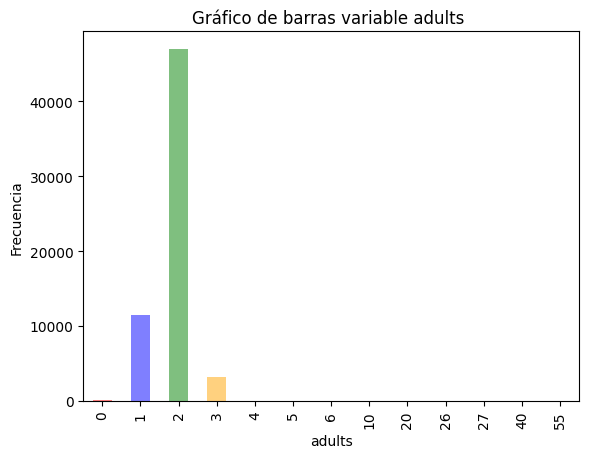

In [37]:
f=ds["adults"].value_counts().sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable adults ", xlabel="adults",ylabel="Frecuencia") 

Variable: *customer_type*

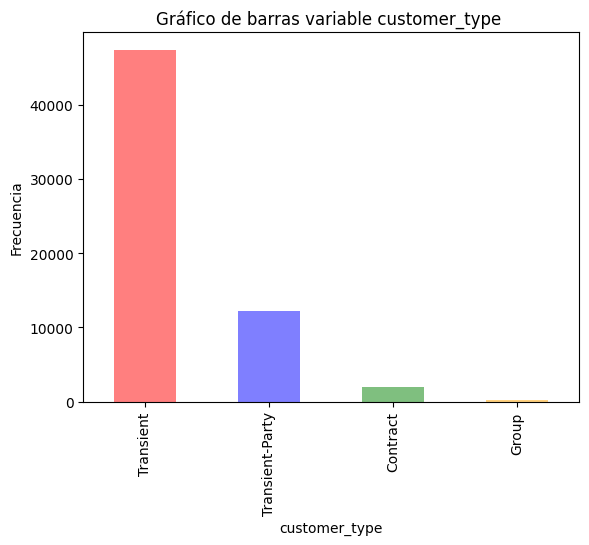

In [45]:
f=ds["customer_type"].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable customer_type ", xlabel="customer_type",ylabel="Frecuencia") 

Variable: *country*

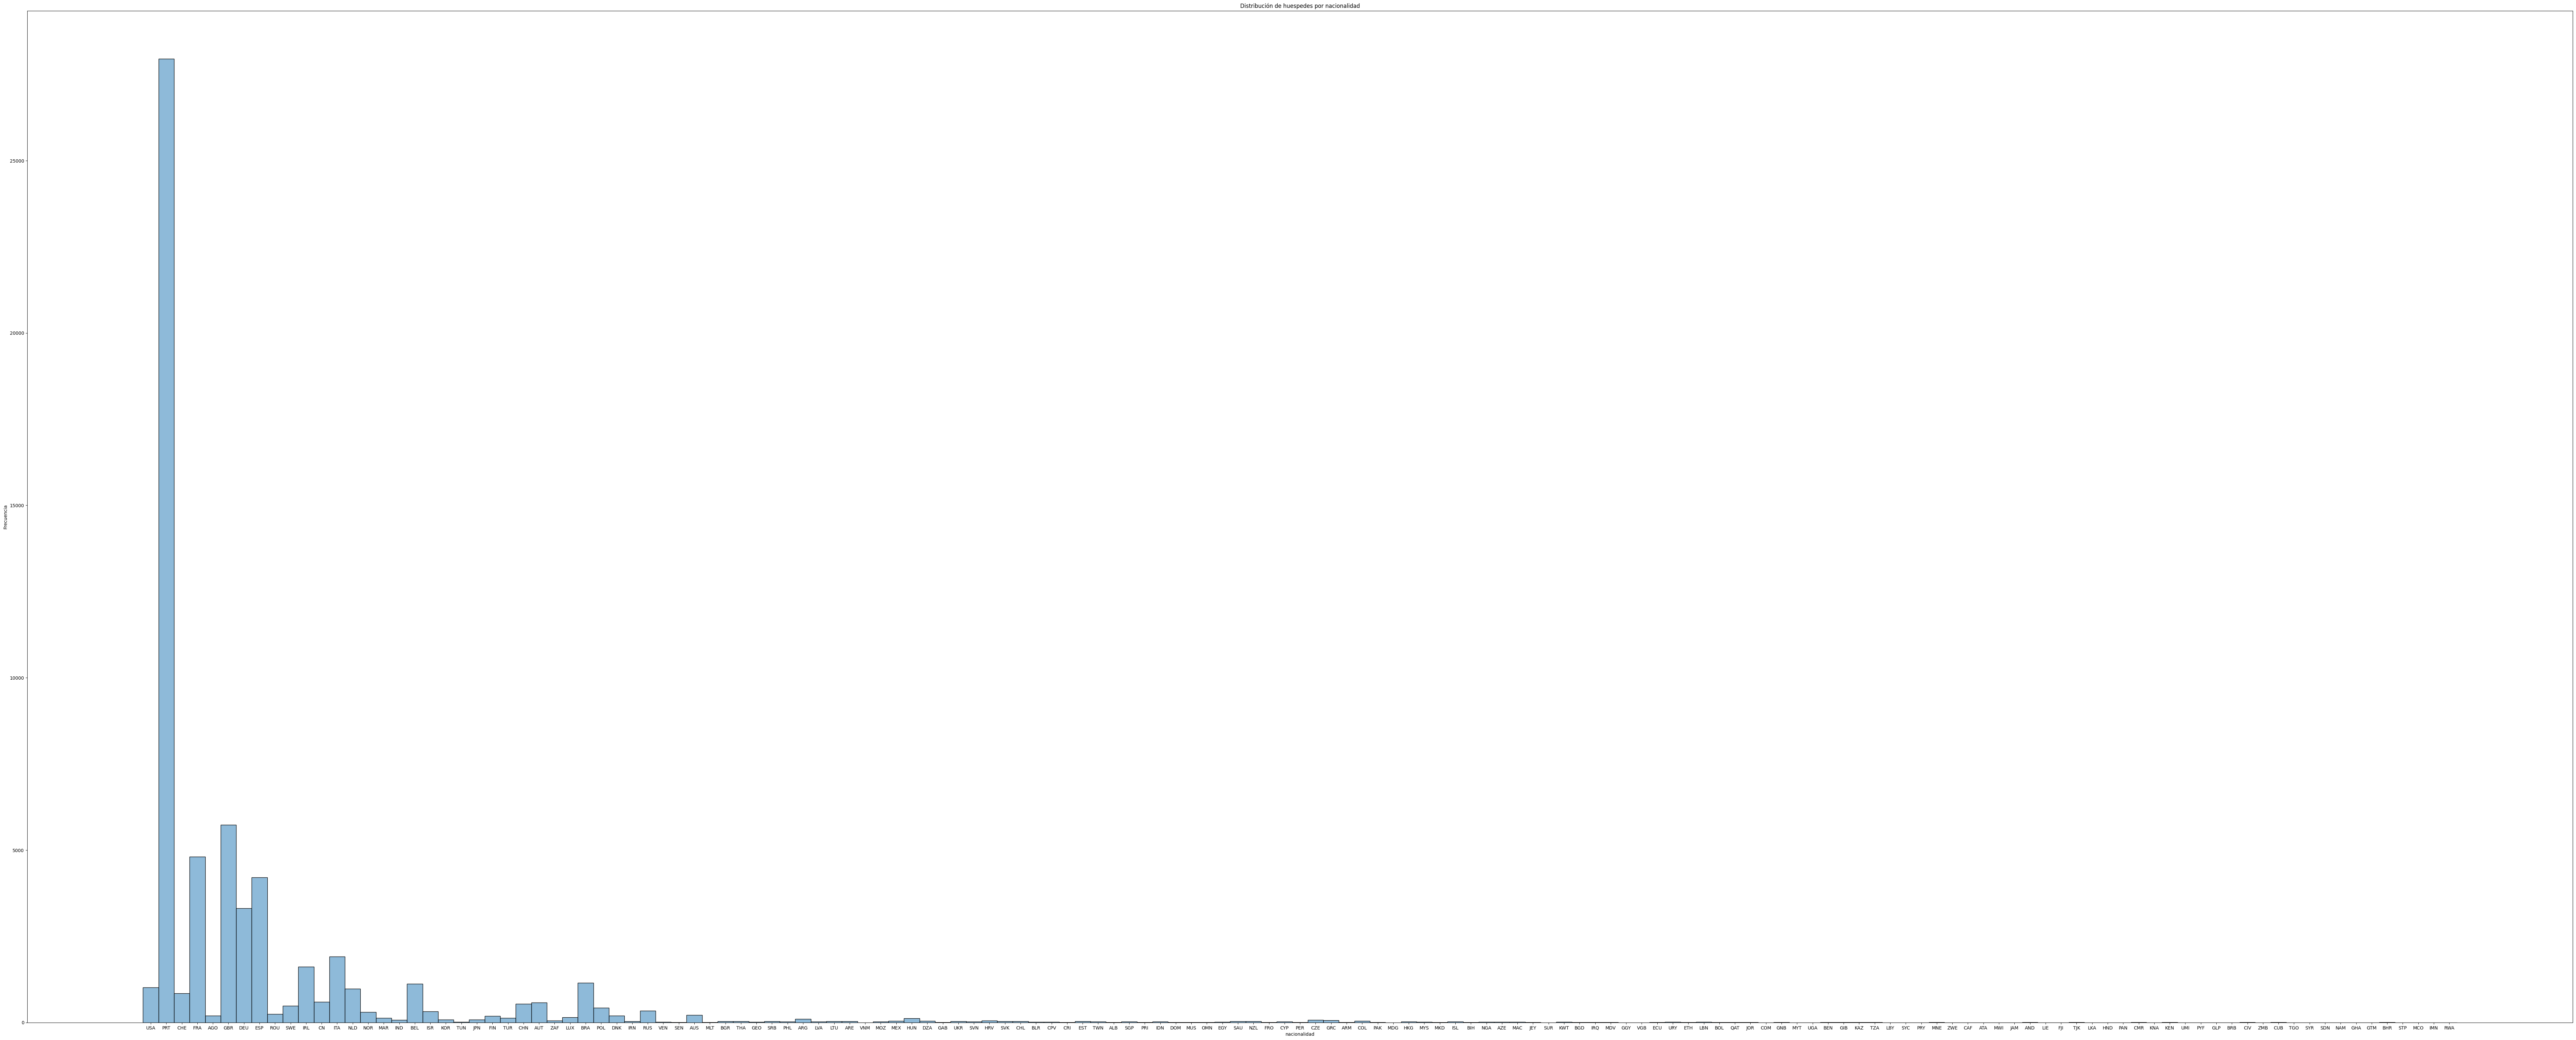

In [22]:
plt.figure(figsize=(100, 40))
sns_hist=sns.histplot(data=ds['country'], alpha = 0.5).set(title="Distribución de huespedes por nacionalidad",xlabel="nacionalidad",ylabel="Frecuencia")

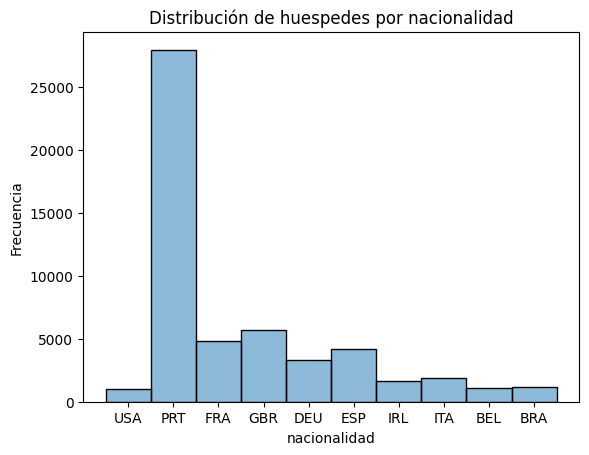

In [23]:
# muestro los 10 paises mas significativos
sns_hist=sns.histplot(data=ds["country"][ds['country'].isin(["PRT",
"GBR",
"FRA",
"ESP",
"DEU",
"ITA",
"IRL",
"BRA",
"BEL",
"USA" ])], alpha = 0.5).set(title="Distribución de huespedes por nacionalidad",xlabel="nacionalidad",ylabel="Frecuencia")

Variables: *arrival*

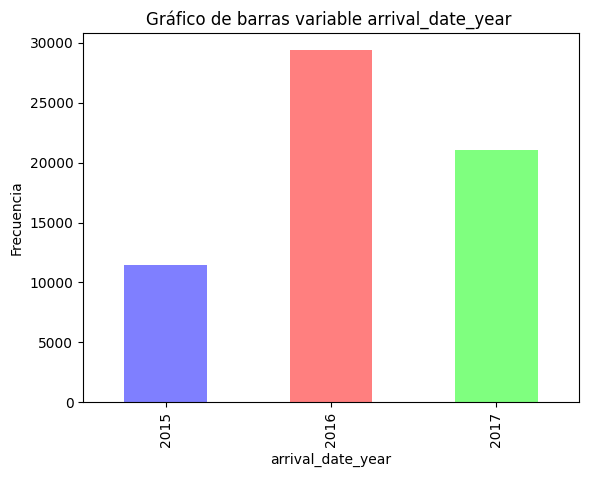

In [21]:
f=ds["arrival_date_year"].value_counts().sort_index().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable arrival_date_year ", xlabel="arrival_date_year",ylabel="Frecuencia") 

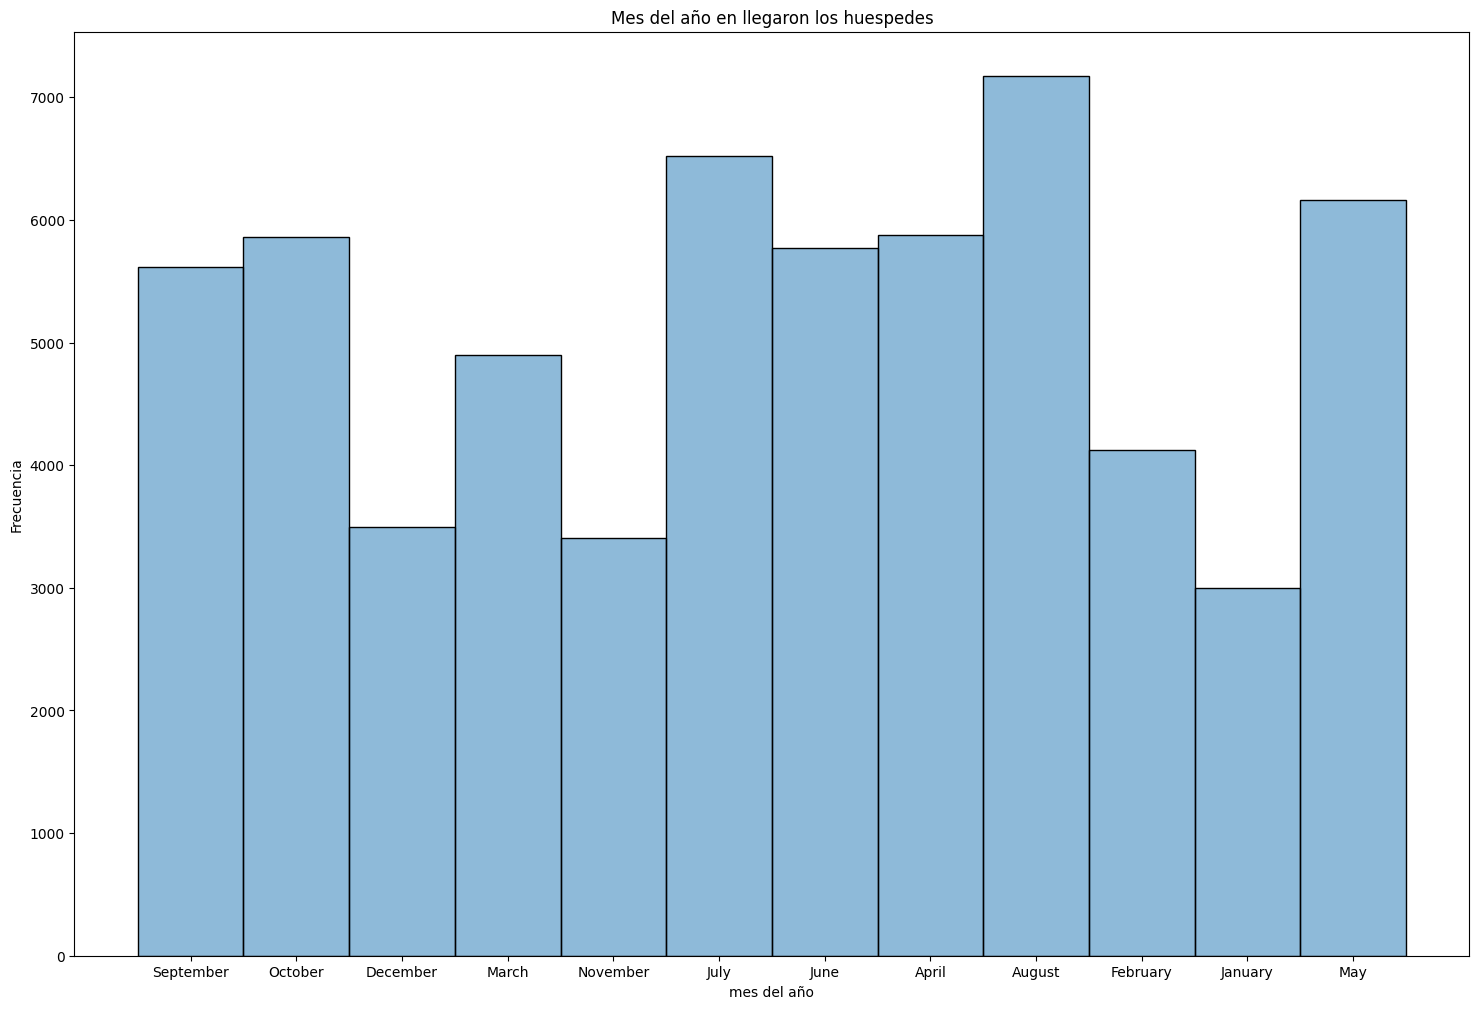

In [28]:

plt.figure(figsize=(18,12))
sns_hist=sns.histplot(data=ds['arrival_date_month'], alpha = 0.5).set(title="Mes del año en llegaron los huespedes",xlabel="mes del año",ylabel="Frecuencia")

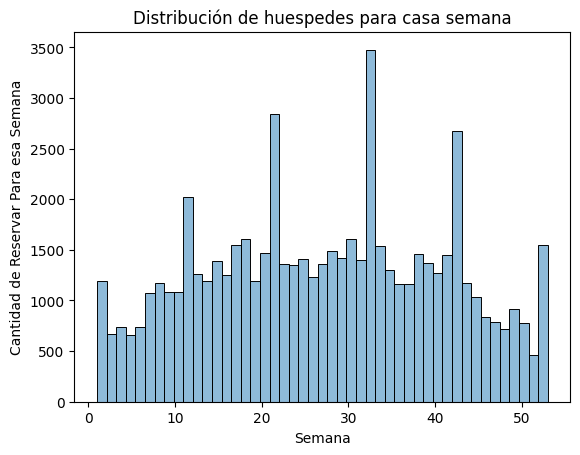

In [26]:
serie_arrival_date_week_number = ds['arrival_date_week_number']

sns_hist=sns.histplot(data=serie_arrival_date_week_number, alpha = 0.5).set(title="Distribución de huespedes para cada semana",xlabel="Semana",ylabel="Cantidad de Reservar Para esa Semana")

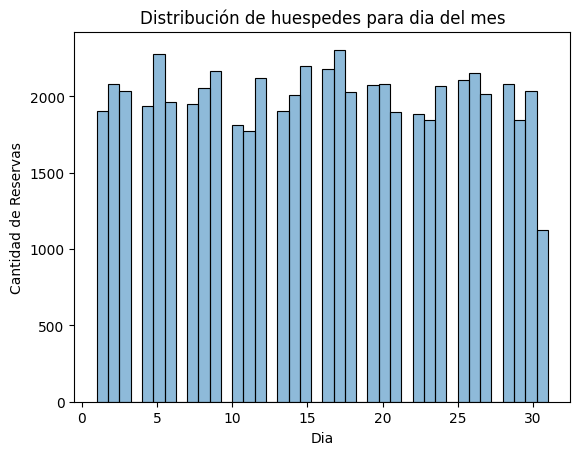

In [27]:
serie_arrival_date_day_of_month = ds['arrival_date_day_of_month']
sns_hist=sns.histplot(data=serie_arrival_date_day_of_month, alpha = 0.5).set(title="Distribución de huespedes para dia del mes",xlabel="Dia",ylabel="Cantidad de Reservas")

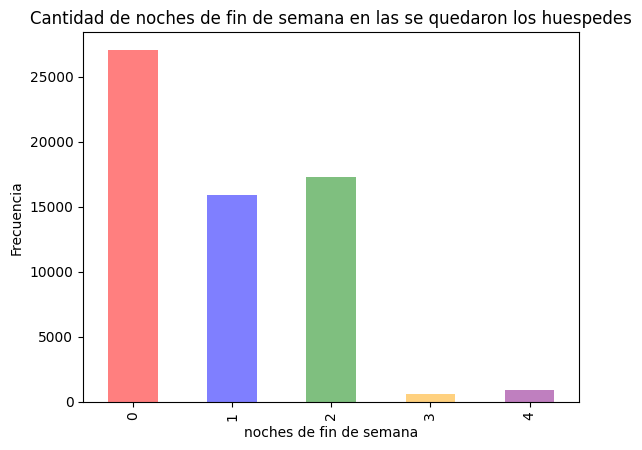

In [38]:
f=ds["stays_in_weekend_nights"].value_counts().drop([6,5,8,7,9,10,12,16]).sort_index().plot.bar(alpha=0.5,color=colores, title="Cantidad de noches de fin de semana en las se quedaron los huespedes", xlabel="noches de fin de semana",ylabel="Frecuencia") 

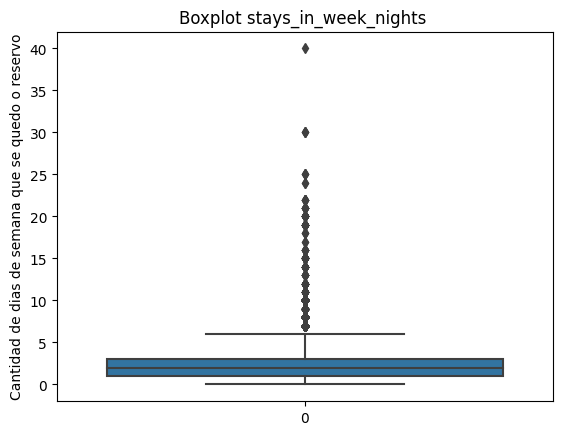

In [29]:
serie_stays_in_week_nights = ds['stays_in_week_nights']
grf=sns.boxplot(data=serie_stays_in_week_nights).set(title="Boxplot stays_in_week_nights ",xlabel="",ylabel="Cantidad de dias de semana que se quedo o reservo")

Variable: *booking_changes*

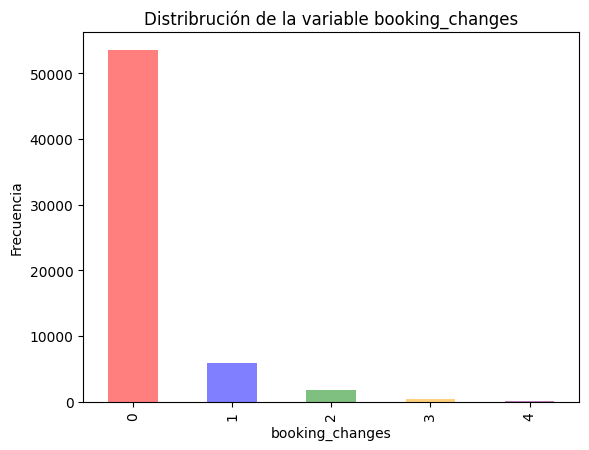

In [41]:
serie_booking_changes = ds['booking_changes'].value_counts()
s_filtered = serie_booking_changes[serie_booking_changes > 100]

f=s_filtered.sort_index().plot.bar(alpha=0.5,color=colores, title="Distribrución de la variable booking_changes", xlabel="booking_changes",ylabel="Frecuencia") 

Variable: *days_in_waiting_list*

0        0
1        0
2        0
3        0
4        0
        ..
61908    0
61909    0
61910    0
61911    0
61912    0
Name: days_in_waiting_list, Length: 61913, dtype: int64


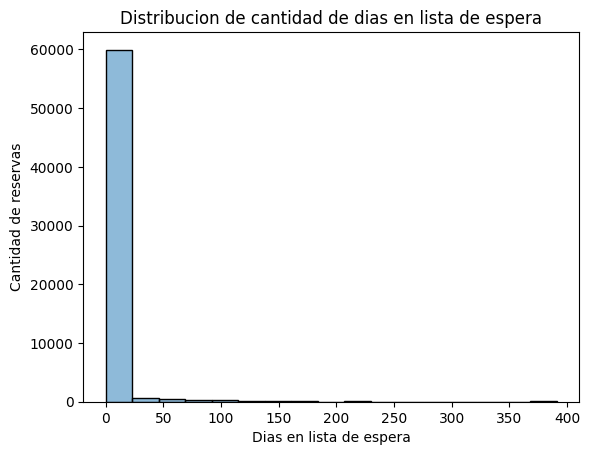

In [31]:
serie_days_in_waiting_list = ds['days_in_waiting_list']
print(serie_days_in_waiting_list)
sns_hist=sns.histplot(data=serie_days_in_waiting_list, alpha = 0.5).set(title="Distribucion de cantidad de dias en lista de espera",xlabel="Dias en lista de espera",ylabel="Cantidad de reservas")

Variable: *total_of_special_requests*

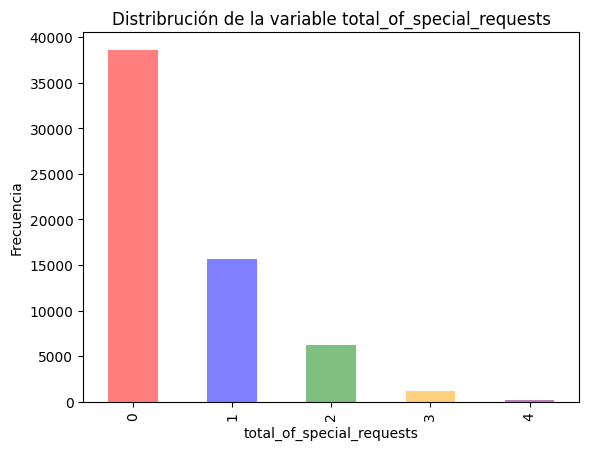

In [43]:
serie_total_of_special_requests = ds['total_of_special_requests'].value_counts()
s_filtered = serie_total_of_special_requests[serie_total_of_special_requests > 50]
f=s_filtered.sort_index().plot.bar(alpha=0.5,color=colores, title="Distribrución de la variable total_of_special_requests", xlabel="total_of_special_requests",ylabel="Frecuencia") 


#Correlaciones existentes entre las variables

HeatMap de todas las variables

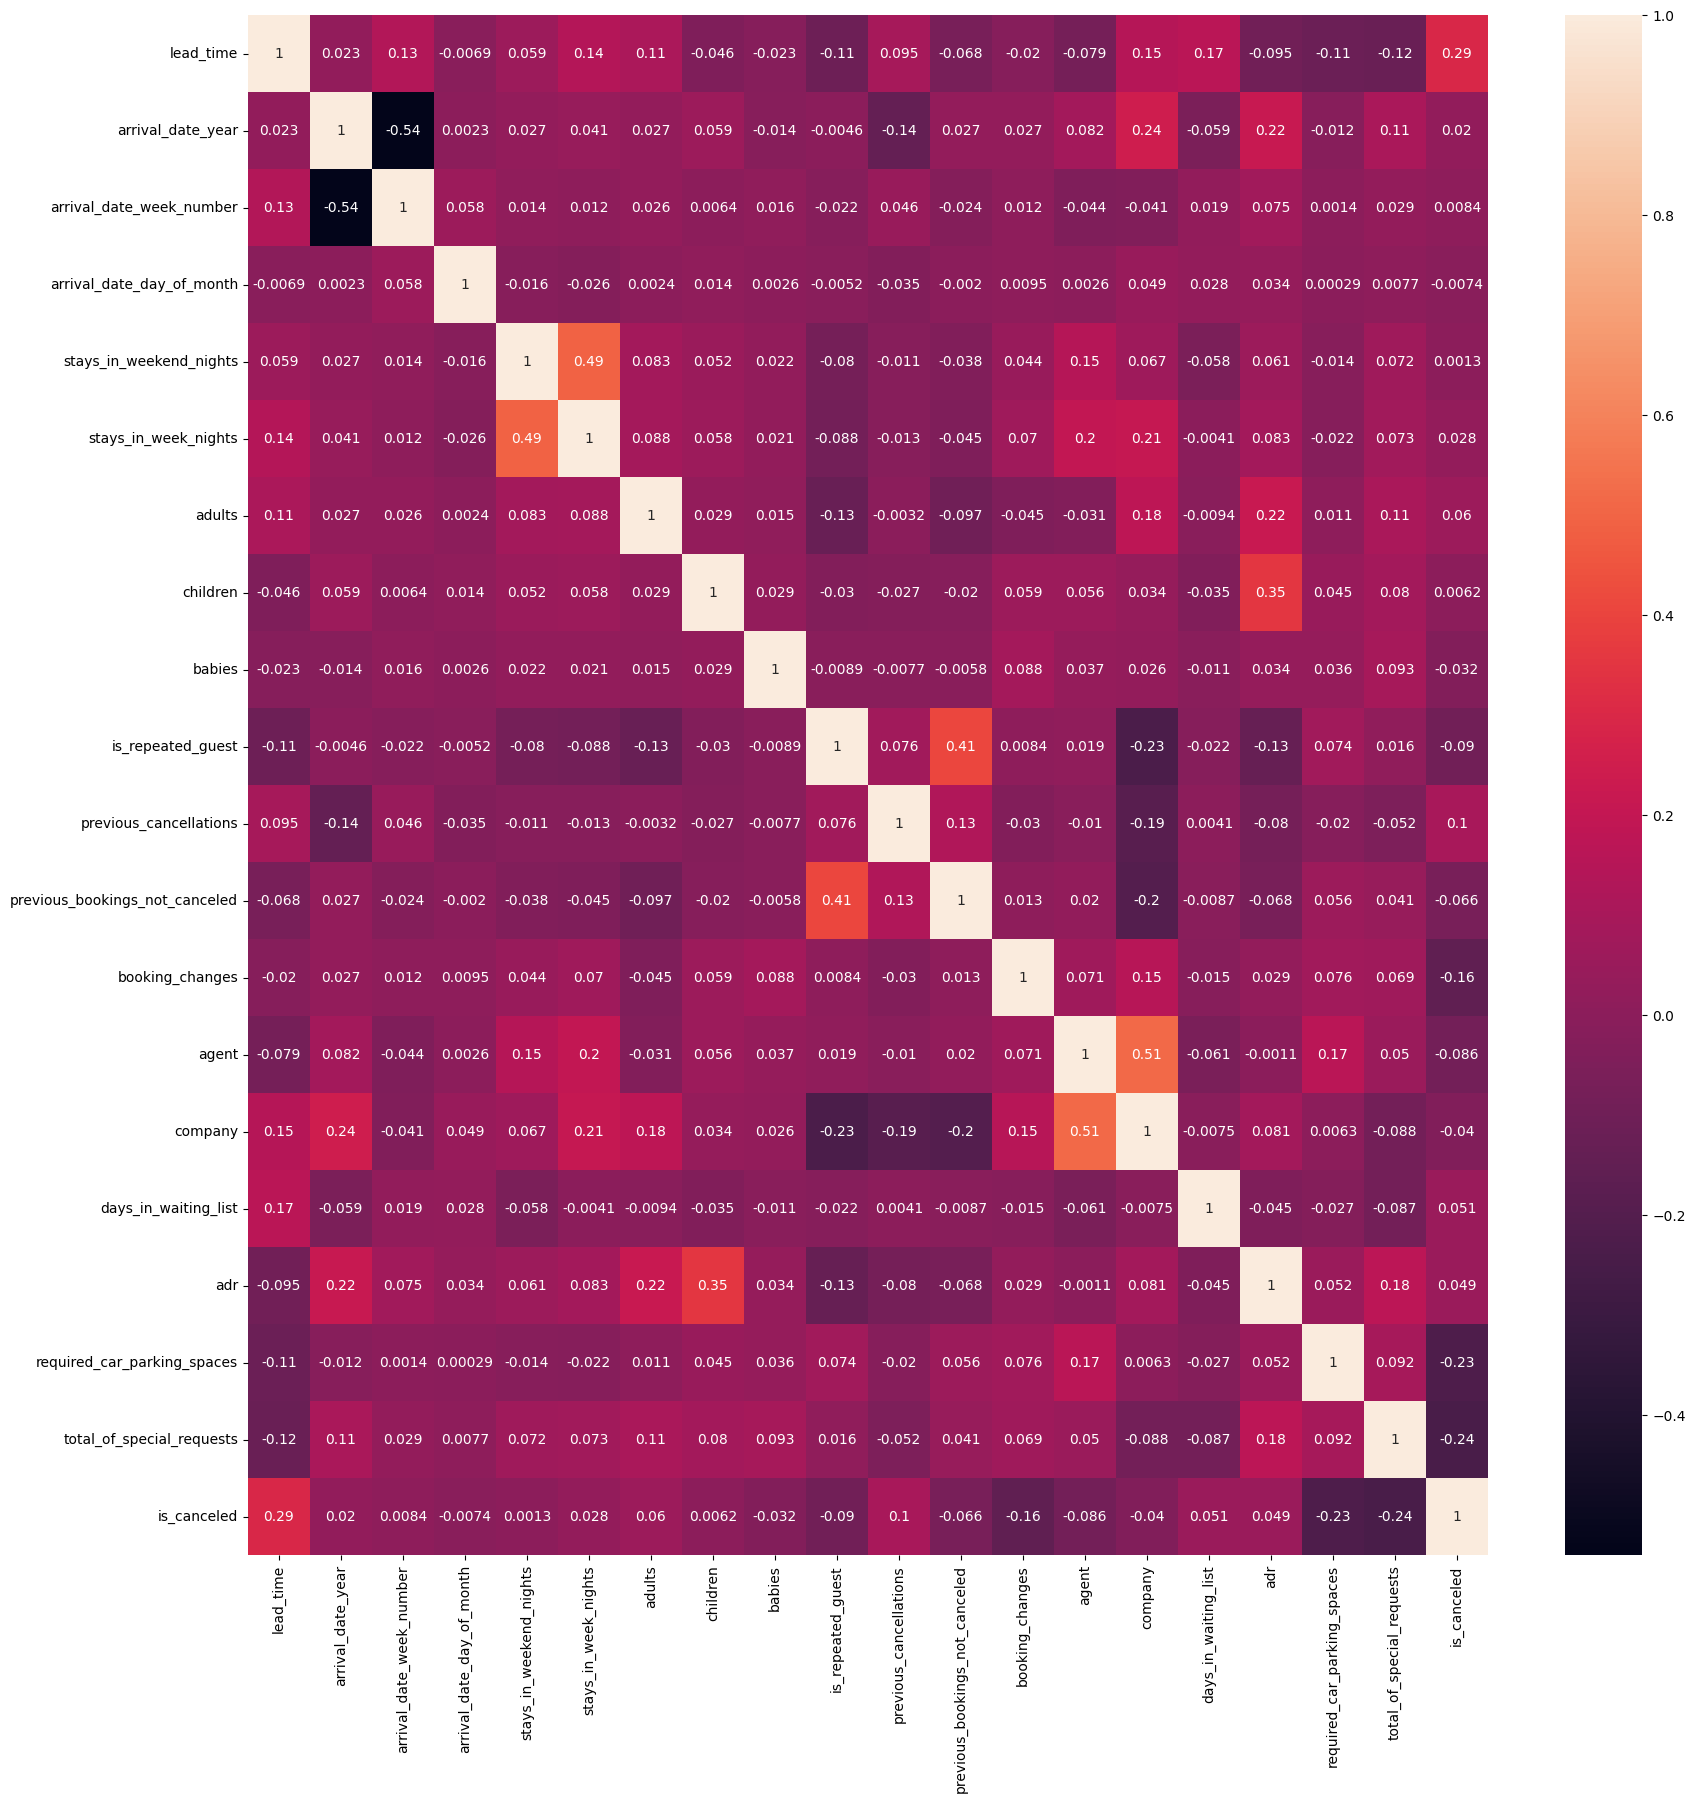

In [33]:
matriz_corr = ds.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_corr, annot = True)
 
plt.show()

Variables mas fuertemente correlacionadas

In [29]:
# variables mas fuertemente correlacionadas
max_corr = ds.corr().unstack().drop_duplicates().sort_values()
display(max_corr.head())
max_corr.tail(10)



arrival_date_year               arrival_date_week_number   -0.540542
total_of_special_requests       is_canceled                -0.244997
is_repeated_guest               company                    -0.233782
required_car_parking_spaces     is_canceled                -0.225915
previous_bookings_not_canceled  company                    -0.199952
dtype: float64

stays_in_week_nights     company                           0.211214
arrival_date_year        adr                               0.217409
adults                   adr                               0.221538
arrival_date_year        company                           0.243066
lead_time                is_canceled                       0.293816
children                 adr                               0.350482
is_repeated_guest        previous_bookings_not_canceled    0.406030
stays_in_weekend_nights  stays_in_week_nights              0.488710
agent                    company                           0.514969
lead_time                lead_time                         1.000000
dtype: float64

Era de esperarse que stays_in_weekend_nights-stays_in_week_nights esten correlacionadas ya que contienen mucha de la misma información.

Lo mismo aplica para arrival_date_year y arrival_date_week_number.

Por otra parte la correlación entre is_repeated_guest-previous_bookings_not_canceled y children-adr valen la pena investigar. 

Diria que la correlacion no es muy significativa porque a company le faltan muchos datos

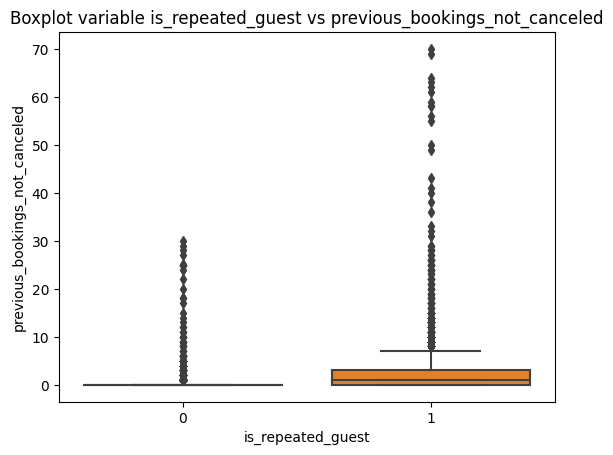

In [36]:
grf=sns.boxplot(y="previous_bookings_not_canceled",x="is_repeated_guest" , data=ds).set(title="Boxplot variable is_repeated_guest vs previous_bookings_not_canceled",xlabel="is_repeated_guest",ylabel="previous_bookings_not_canceled")

Pareceria que hay una relacion tener mas de una reserva no cancelada y ser huesped repetido

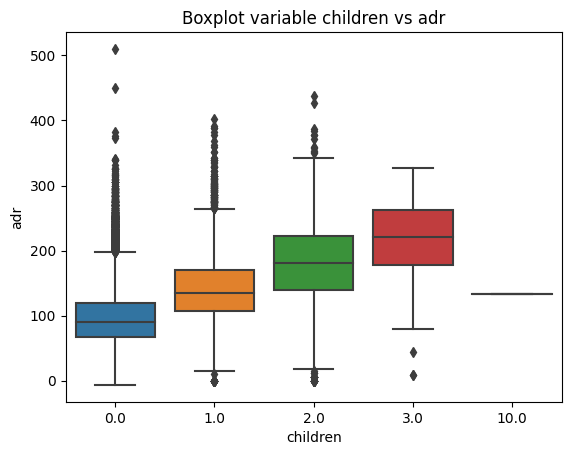

In [37]:
grf=sns.boxplot(y="adr",x="children" , data=ds).set(title="Boxplot variable children vs adr",xlabel="children",ylabel="adr")

#Relación de las variables con el target

Pareceria que hay una relacion tener mas hijos y gastar mas en el hotel

In [38]:
matriz_corr_target = ds.corrwith(ds["is_canceled"])
matriz_corr_target

lead_time                         0.293816
arrival_date_year                 0.019923
arrival_date_week_number          0.008357
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
stays_in_week_nights              0.028439
adults                            0.060179
children                          0.006242
babies                           -0.032034
is_repeated_guest                -0.090492
previous_cancellations            0.099613
previous_bookings_not_canceled   -0.065868
booking_changes                  -0.159315
agent                            -0.086176
company                          -0.040010
days_in_waiting_list              0.050827
adr                               0.049206
required_car_parking_spaces      -0.225915
total_of_special_requests        -0.244997
is_canceled                       1.000000
dtype: float64

Se puede ver que lead_time y previous_cancellations tienen cierta correlación positiva con el target y que total_of_special_requests y total_of_special_requests tienen cierta correlación negativa

Para analziar variables cuantitativas hacemos graficos

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'company', 'customer_type', 'id']
hotel


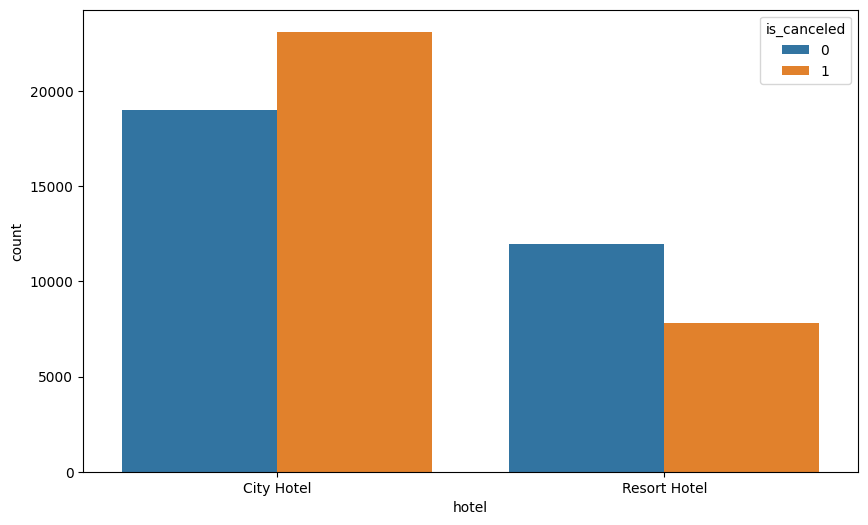

arrival_date_month


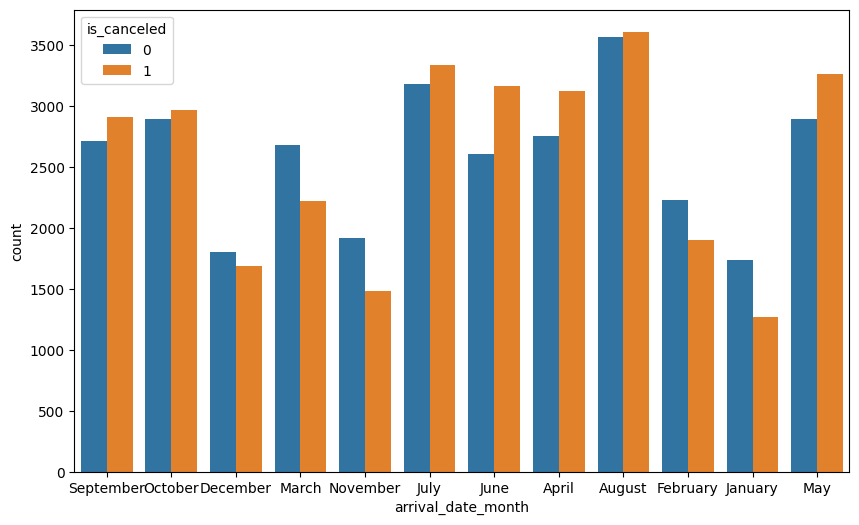

country


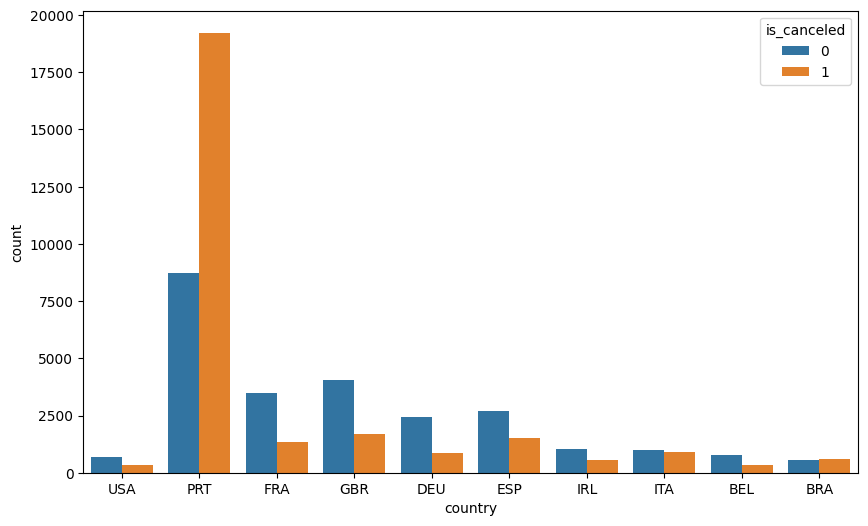

market_segment


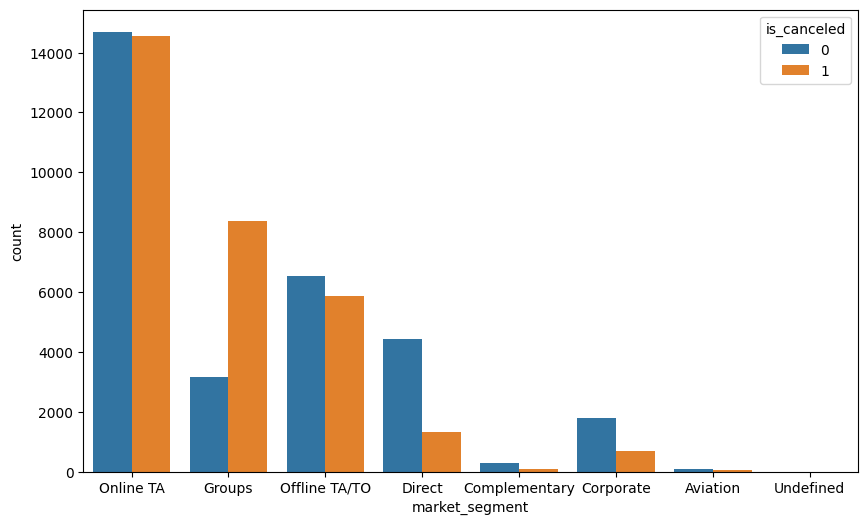

distribution_channel


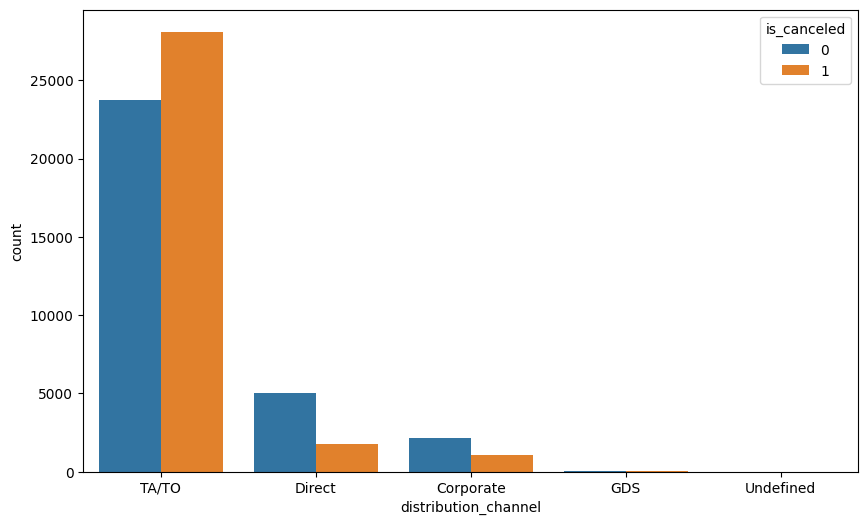

reserved_room_type


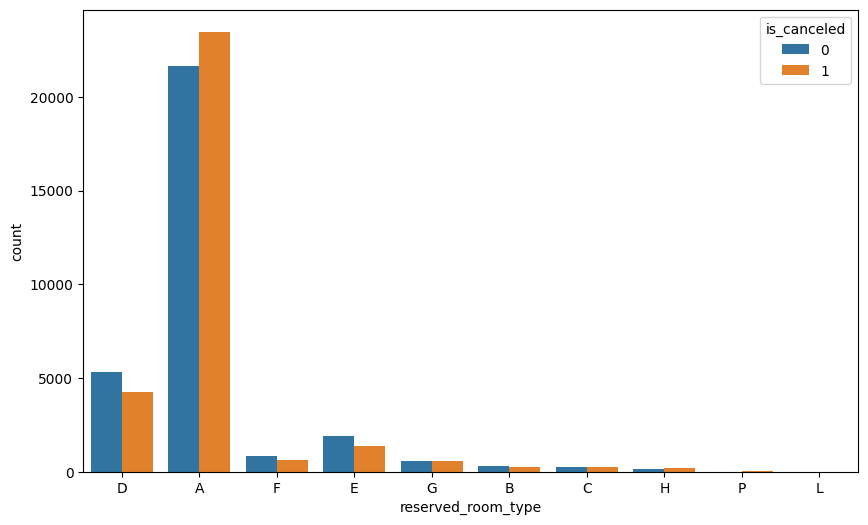

assigned_room_type


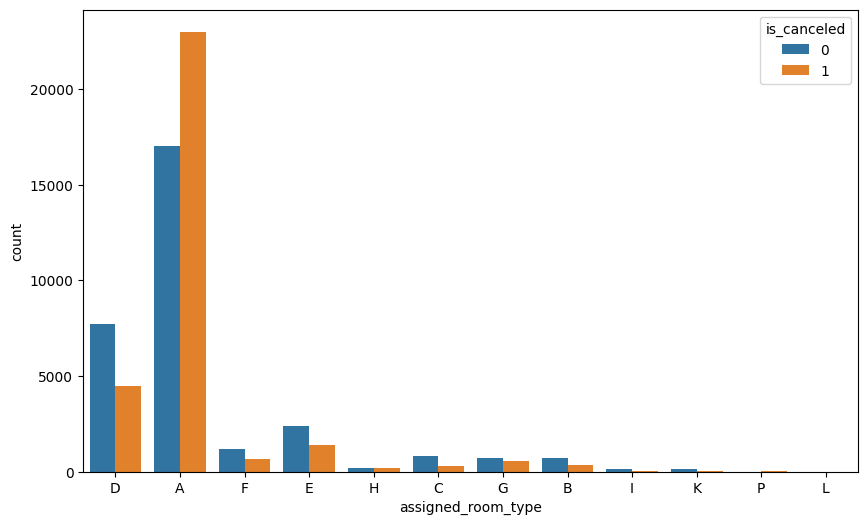

deposit_type


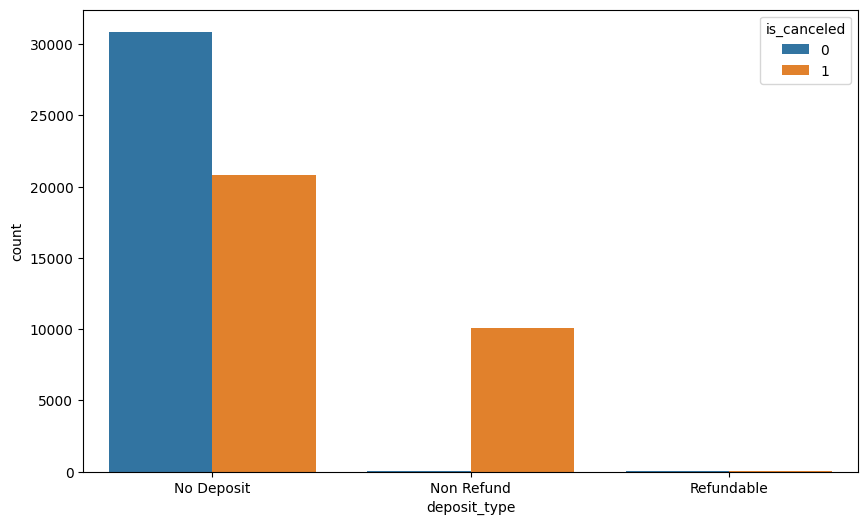

customer_type


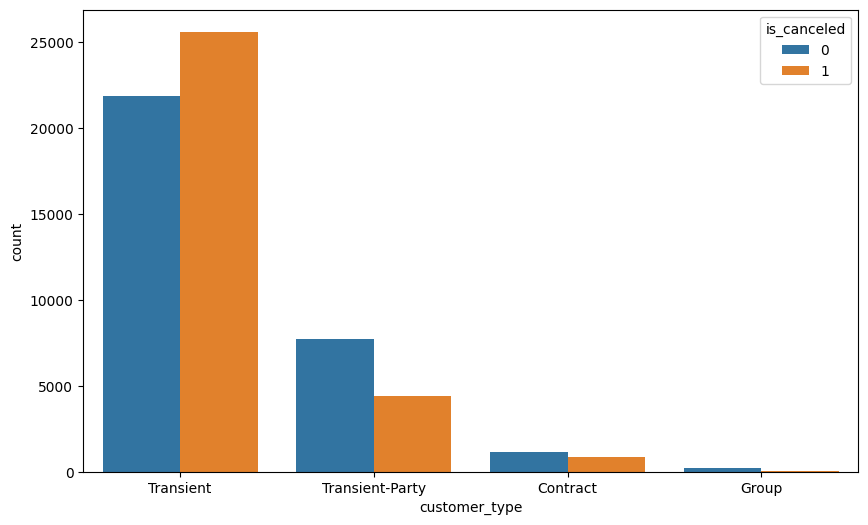

In [39]:
def graf_corr_target(ds, variables):
  for var in variables:
    if var in ["id", "company","meal"]:
      continue
    print(var)
    datos = ds
    plt.figure(figsize=(10,6))
    if var == "country":
      datos = ds[ds["country"].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BRA","BEL","USA" ])]
    sns.countplot(data=datos, x=var, hue="is_canceled")
    plt.show()
print(var_cual)
graf_corr_target(ds, var_cual)

De los graficos (asumiendo que las relaciones que muestran son verdaremente causales) algunas de la conclusiones que se pueden sacar son:
* Quienes se quedan en el City Hotel tienen mas chances de cancelar y los que se quedan en el Resort Hotel menos
* Huespedes proveniente de PRT (creo que es Portugal) tienen mas del doble de chances de de cancelar que de no hacerlo
*  Para market_segment: Groups muestra mas del doble de chances de cancelar y tanto Direct como Corporate mas del doble de no cancelar
* Para distribution_channel: Direct muestra mas del doble de chances de no cancelar
* Para assigned_room_type: A muestra considerablemente mayor chance de cancelar que de no hacerlo
* Para deposit_type: No Deposit muestra considerablemente mayor chance de no cancelar que de hacerlo y Non Refund es solo para cancelaciones

# Analisis de datos faltantes



In [40]:
print(ds.isnull().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


In [41]:
ds.isin(['Undefined']).sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                              591
country                             0
market_segment                      2
distribution_channel                4
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

La varible **meal** contiene una caractegoria como valor 'Undefined' asi que no cuuenta como dato faltante

In [42]:
ds.drop_duplicates(inplace=True)
ds

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                            1                     2       1       0.0   
1                            0                     1       2       0.0   
2                            0                     1       2       2.0   
3                            2                     5       2       0.0   
4                            2                     5       2       0.0   
...                        ...                   ...     ...       ...   
61908                        0                     2       2       0.0   
61909                        0                     1       1       0.0   
61910                        1                     2       1       0.0   
61911                        2                     5       2       0.0   
61912                        2                     5       2       0.0   

       babies meal country market_segment distribution_channel  \
0           0   BB     USA      Online TA                TA/TO   
1           0   BB     PRT         Groups               Direct   
2           0   BB     CHE      Online TA                TA/TO   
3           0   BB     PRT         Groups                TA/TO   
4           0   BB     FRA  Offline TA/TO                TA/TO   
...       ...  ...     ...            ...                  ...   
61908       0   BB     ESP      Online TA                TA/TO   
61909       0   SC     FRA      Online TA                TA/TO   
61910       0   BB     FRA       Aviation            Corporate   
61911       0   BB     PRT         Groups                TA/TO   
61912       0   HB     ISR      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
61908                  0                       0   
61909                  0                       0   
61910                  0                       0   
61911                  0                       0   
61912                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
0                 

Eliminamos las filas duplicadas

Las variables que poseen datos faltantes son: 
 **children, country, agent, company**, **distribution_chanel** y **market_segment**

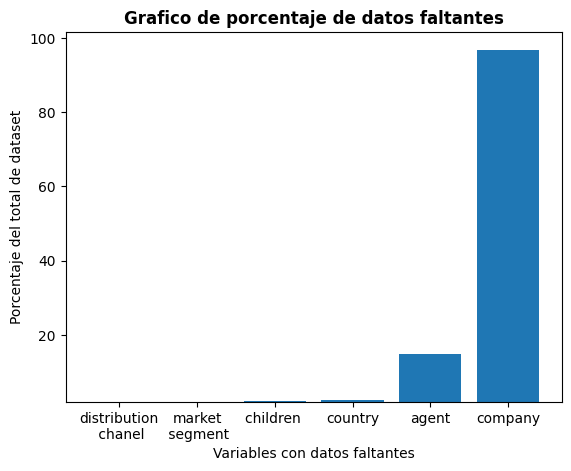

In [43]:
filas_totales = ds.shape[0]

variables_no_asignadas = ['distribution\n chanel','market\n segment','children ','country','agent','company']
children_no_asignado = (ds[ds.children.isnull() == True].children.size/filas_totales)*100
country_no_asignado = (ds[ds.country.isnull() == True].country.size/filas_totales)*100
agent_no_asignado = (ds[ds.agent.isnull() == True].agent.size/filas_totales)*100
company_no_asignado = (ds[ds.company.isnull() == True].company.size/filas_totales)*100
market_segment_no_valido = (ds[ds.market_segment.isnull() == True].company.size/filas_totales)*100
distribution_chanel_no_valido = (ds[ds.distribution_channel.isnull() == True].company.size/filas_totales)*100

valores_no_asignados = [distribution_chanel_no_valido, market_segment_no_valido, children_no_asignado, 
                        country_no_asignado, agent_no_asignado, company_no_asignado]

#values = np.arange(len(variables_no_asignadas)) 
#plt.bar(values,valores_cancelados,bottom=2,label='cancelados')
#plt.bar(values+2*0.8,valores_no_cancelados,bottom=2,label='no cancelados')
plt.bar(variables_no_asignadas,valores_no_asignados,bottom=2)
plt.xlabel("Variables con datos faltantes", fontweight= 500)
plt.ylabel("Porcentaje del total de dataset")
plt.title("Grafico de porcentaje de datos faltantes", fontweight= 560)
#plt.xticks(values,variables_no_asignadas)
#plt.legend()
plt.show()

In [44]:
_ds = ds.copy()
_ds[_ds.children.isnull() | _ds.company.isnull() | _ds.agent.isnull() | _ds.country.isnull()]

"\nchildren_nulls_cancelados = (ds[ds.children.isnull() & ds.is_canceled].shape[0]/filas_totales)*100\ncountry_nulls_cancelados = (ds[ds.country.isnull() & ds.is_canceled].shape[0]/filas_totales)*100\nagent_nulls_cancelados = (ds[ds.agent.isnull() & ds.is_canceled].shape[0]/filas_totales)*100\ncompany_nulls_cancelados = (ds[ds.children.isnull() & ds.is_canceled].shape[0]/filas_totales)*100\nmarket_segment_undifined_cancelados = (ds[(ds.market_segment == 'Undefined') & ds.is_canceled].shape[0]/filas_totales)*100\ndistribution_chanel_undifined_cancelados = (ds[(ds.distribution_channel == 'Undefined') & ds.is_canceled].shape[0]/filas_totales)*100\n\nvalores_cancelados = [distribution_chanel_undifined_cancelados, market_segment_undifined_cancelados, children_nulls_cancelados, \n                        country_nulls_cancelados, agent_nulls_cancelados, company_nulls_cancelados]\n\nchildren_nulls_no_cancelados = (ds[ds.children.isnull() & (ds.is_canceled == False)].shape[0]/filas_totales)*100

Solo el 5% de datos de la variable company son los que no tienen nans y lo mejor seria eliminarla ya que la columna no tiene mucha relevancia para el uso de la prediccion

In [45]:
ds.drop(columns= 'company', inplace = True)

Para el caso de **children**, **country**, **agent**, **market_segment** y **distribution_chanel** vamos a buscar el valor mas frecuente de la variable y la vamos a imputar

In [46]:
ds.children.value_counts()/len(ds[ds.children.isnull() == False])*100

0.0     92.808800
1.0      3.968728
2.0      3.157861
3.0      0.062996
10.0     0.001615
Name: children, dtype: float64

In [47]:
ds.children.replace([np.NaN],0, inplace= True)
ds.children.value_counts()/len(ds)*100

0.0     92.809265
1.0      3.968472
2.0      3.157657
3.0      0.062992
10.0     0.001615
Name: children, dtype: float64

In [48]:
ds.country.value_counts()/len(ds[ds.country.isnull() == False])*100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

In [49]:
ds.country.replace([np.NaN],'PRT', inplace= True)
ds.country.value_counts()/len(ds)*100

PRT    45.500945
GBR     9.259768
FRA     7.767351
ESP     6.799864
DEU     5.349442
         ...    
HND     0.001615
FJI     0.001615
LIE     0.001615
ATA     0.001615
RWA     0.001615
Name: country, Length: 149, dtype: float64

In [3]:
ds.agent.value_counts()/len(ds[ds.agent.isnull() == False])*100

9.0      31.475483
240.0    13.671955
1.0       8.189105
14.0      3.146808
6.0       3.033893
7.0       2.926531
250.0     2.491531
241.0     1.425319
3.0       1.367936
8.0       1.354978
37.0      1.343872
28.0      1.288340
19.0      1.225404
21.0      1.012532
40.0      0.842234
314.0     0.831127
229.0     0.829276
29.0      0.779298
242.0     0.718213
12.0      0.618255
20.0      0.607149
83.0      0.603447
171.0     0.551617
96.0      0.547915
134.0     0.534957
85.0      0.490532
298.0     0.466468
30.0      0.464617
56.0      0.447957
243.0     0.422042
26.0      0.399830
58.0      0.397979
27.0      0.381319
11.0      0.381319
86.0      0.359106
15.0      0.353553
44.0      0.336894
5.0       0.331340
119.0     0.327638
236.0     0.322085
273.0     0.309128
34.0      0.305425
177.0     0.303574
22.0      0.292468
38.0      0.273957
196.0     0.272106
68.0      0.261000
315.0     0.255447
10.0      0.249894
17.0      0.248043
154.0     0.225830
138.0     0.223979
191.0     0.

In [51]:
ds.agent.replace([np.NaN],9.0, inplace= True)
ds.agent.value_counts()/len(ds)*100

9.0      40.208034
240.0    11.929643
1.0       7.145511
14.0      2.745788
6.0       2.647263
           ...    
420.0     0.001615
352.0     0.001615
450.0     0.001615
283.0     0.001615
25.0      0.001615
Name: agent, Length: 296, dtype: float64

In [52]:
ds[ds.distribution_channel != 'Undefined'].distribution_channel.value_counts()/len(ds)*100

TA/TO        83.744932
Direct       10.981539
Corporate     5.123318
GDS           0.143750
Name: distribution_channel, dtype: float64

In [53]:
ds.distribution_channel.replace(['Undefined'],'TA/TO', inplace= True)
ds.distribution_channel.value_counts()/len(ds)*100

TA/TO        83.751393
Direct       10.981539
Corporate     5.123318
GDS           0.143750
Name: distribution_channel, dtype: float64

In [54]:
ds[ds.market_segment != 'Undefined'].market_segment.value_counts()/len(ds)*100

Online TA        47.274401
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Name: market_segment, dtype: float64

In [55]:
ds.market_segment.replace(['Undefined'],'Online TA', inplace= True)
ds.market_segment.value_counts()/len(ds)*100

Online TA        47.277632
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Name: market_segment, dtype: float64

In [56]:
ds.isnull().sum()/filas_totales

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [57]:
ds[ds.distribution_channel == 'Undefined'].shape[0]

0

In [58]:
ds[ds.market_segment == 'Undefined'].shape[0]

0

Ya no hay NaNs

# Analisis valores atipicos

In [4]:
ds_atipico = ds.copy()

In [61]:
ds_atipico.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        1                     2       1       0.0       0   
1                        0                     1       2       0.0       0   
2                        0                     1       2       2.0       0   
3                        2                     5       2       0.0       0   
4                        2                     5       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     USA      Online TA                TA/TO                  0   
1   BB     PRT         Groups               Direct                  0   
2   BB     CHE      Online TA                TA/TO                  0   
3   BB     PRT         Groups                TA/TO                  0   
4   BB     FRA  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  D   
1                       0                               0                  A   
2                       0                               0                  F   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  D                0   No Deposit    9.0   
1                  A                0   No Deposit    9.0   
2                  F                0   No Deposit    9.0   
3                  A                0   Non Refund  154.0   
4                  A                0   No Deposit   20.0   

   days_in_waiting_list    customer_type    adr  required_car_parking_spaces  \
0                     0        Transient  115.5                            0   
1                     0        Transient   42.0                            1   
2                     0        Transient  229.0                            0   
3                     0        Transient   75.0                            0   
4                     0  Transient-Party   75.0                            0   

   total_of_special_requests                                    id  \
0                          1  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689   
1                          0  b1428f80-c56c-4ae4-91a9-6962edae08b1   
2                          2  2226c018-ea20-4c4e-8f71-ea66aee70d7c   
3                          0  314f56dc-2e4d-4298-9bdd-27bb008bffff   
4                          1  28c75445-c603-413a-babf-ad377018b592   

   is_canceled  z_lead_time  z_arrival_date_year  z_arrival_date_week_number  \
0            1    -0.571260            -0.218454                    0.723199   
1            0    -0.977701            -1.630120                    1.240725   
2            0    -0.788028            -0.218454                    1.092860   
3            1    -0.778996            -0.218454                    1.758250   
4            0    -0.074498             1.193211                   -1.125107   

   z_arrival_date_day_of_month  z_stays_in_weekend_nights  \
0                    -1.226299                   0.0


Al ser variables cualitativas sus valores no pueden tener una distribición atipica



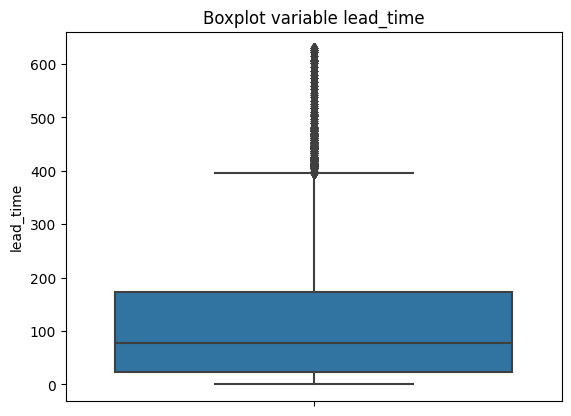

-200.5
395.5


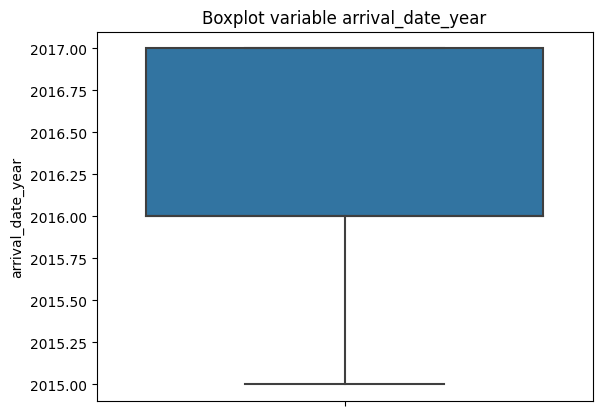

2014.5
2018.5


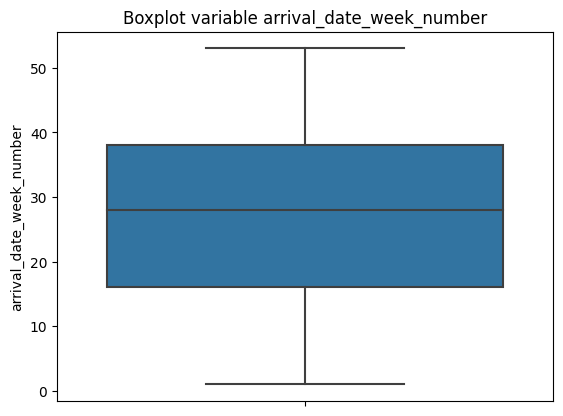

-17.0
71.0


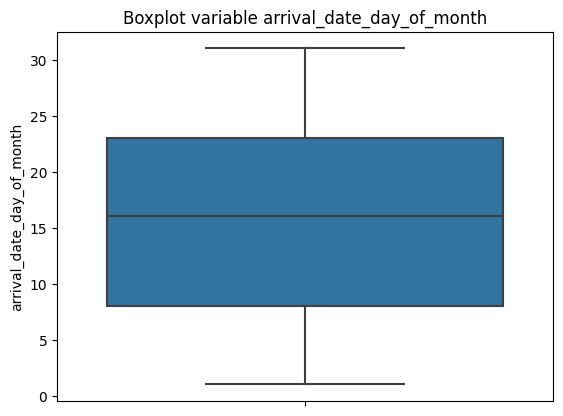

-14.5
45.5


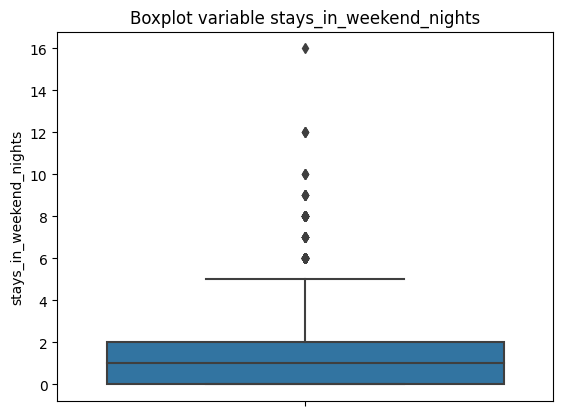

-3.0
5.0


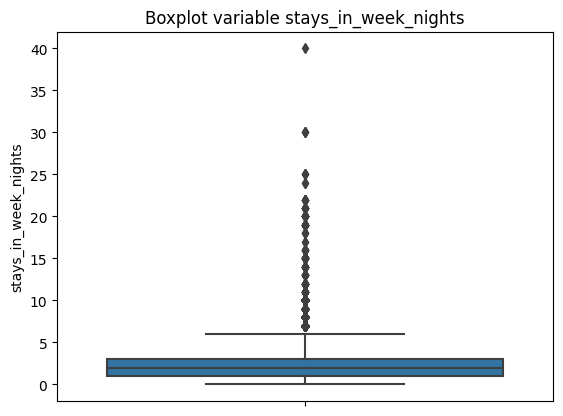

-2.0
6.0


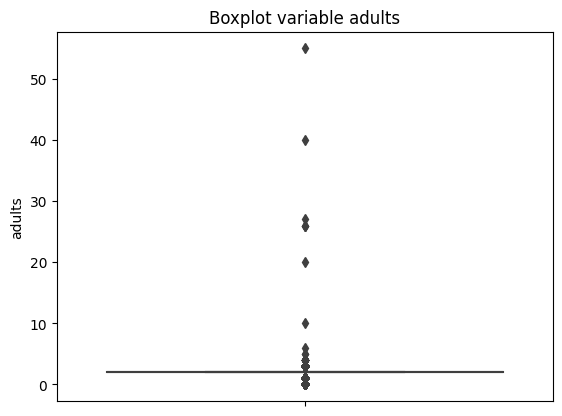

2.0
2.0


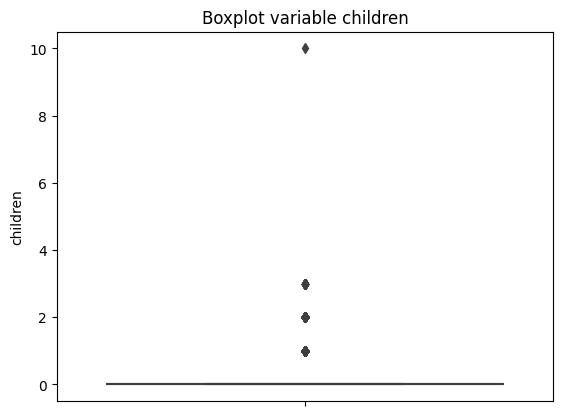

nan
nan


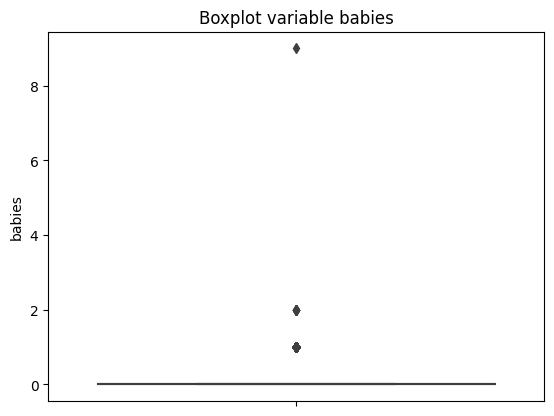

0.0
0.0


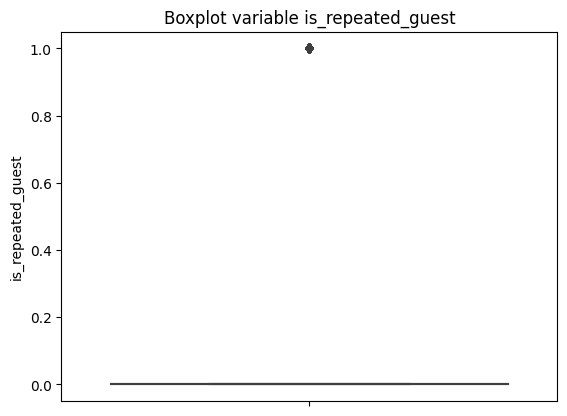

0.0
0.0


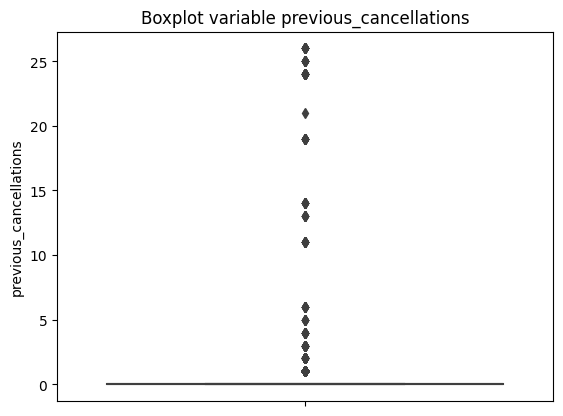

0.0
0.0


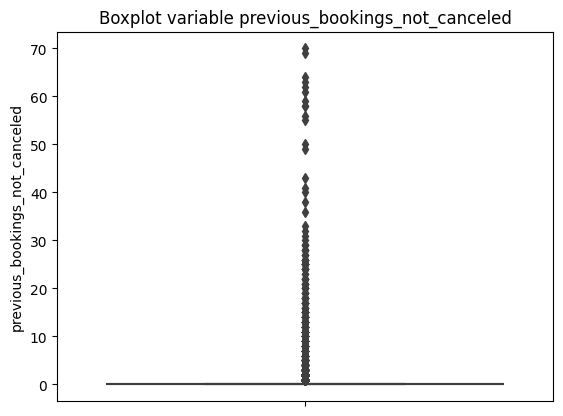

0.0
0.0


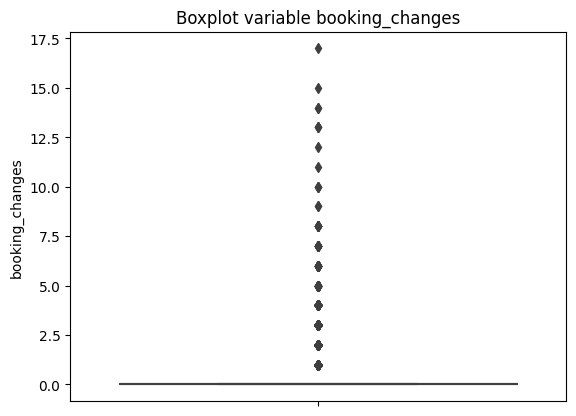

0.0
0.0


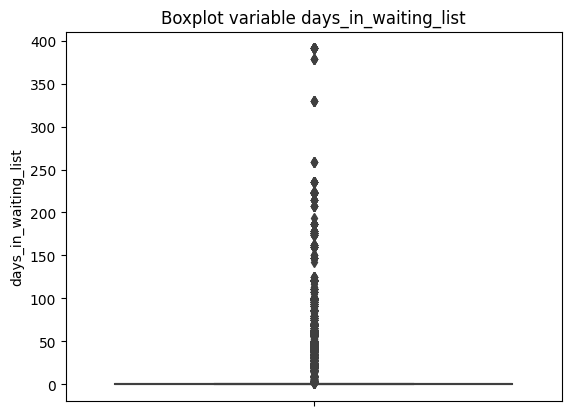

0.0
0.0


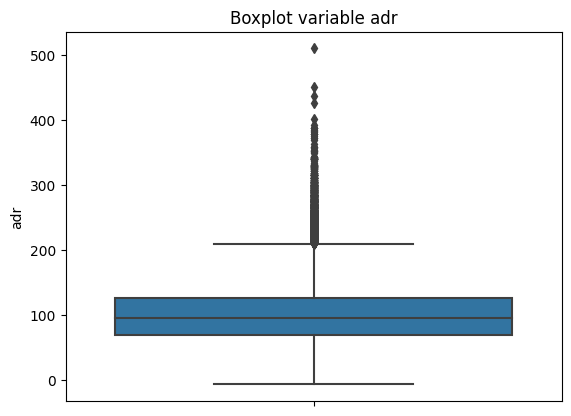

-14.0
210.0


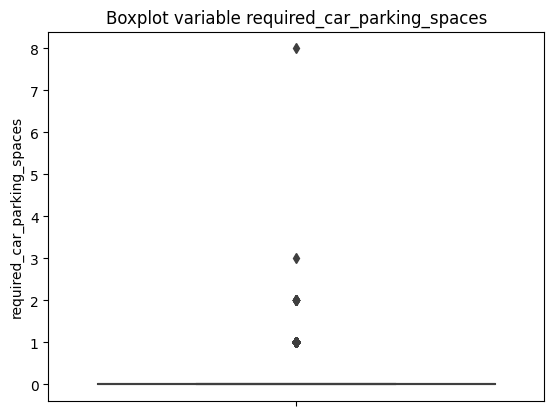

0.0
0.0


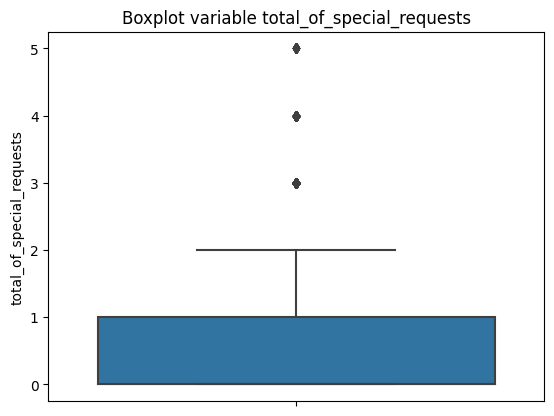

-1.5
2.5


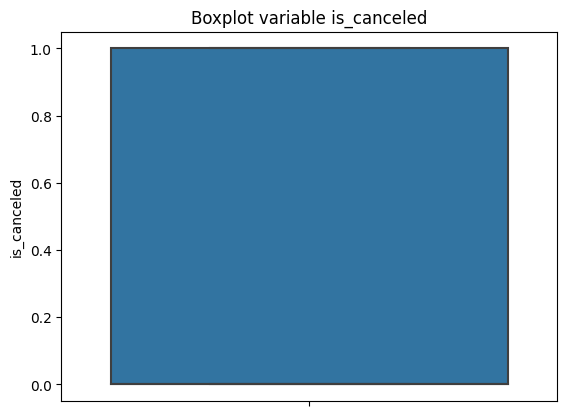

-1.5
2.5


In [9]:
def graf_val_atipicos(ds, columnas):
    for col in columnas:
        grf = sns.boxplot(y=col, data=ds).set(title="Boxplot variable " + col, ylabel=col)
        plt.show()
        Q1=np.quantile(ds[col],0.25)
        Q3=np.quantile(ds[col],0.75)


        IQR=Q3-Q1


        out_sup=Q3+1.5*IQR
        out_inf=Q1-1.5*IQR
        print(out_inf)
        print(out_sup)
graf_val_atipicos(ds_atipico, var_cuant)

# Analisis por variable de valores atipicos

In [64]:
ds[ds["lead_time"] > 400]

hotel  lead_time  arrival_date_year arrival_date_month  \
15     City Hotel        465               2017               July   
51     City Hotel        489               2016           November   
82     City Hotel        412               2016             August   
95     City Hotel        454               2016            October   
99     City Hotel        420               2016          September   
...           ...        ...                ...                ...   
61753  City Hotel        433               2016          September   
61761  City Hotel        496               2016           November   
61768  City Hotel        433               2016          September   
61783  City Hotel        454               2016            October   
61790  City Hotel        538               2016           December   

       arrival_date_week_number  arrival_date_day_of_month  \
15                           30                         26   
51                           46                         10   
82                           35                         25   
95                           41                          6   
99                           36                          3   
...                         ...                        ...   
61753                        37                          8   
61761                        47                         17   
61768                        38                         15   
61783                        41                          6   
61790                        53                         29   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
15                           0                     3       2       0.0   
51                           0                     2       2       0.0   
82                           0                     2       2       0.0   
95                           0                     2       2       0.0   
99                           2                     2       2       0.0   
...                        ...                   ...     ...       ...   
61753                        0                     3       2       0.0   
61761                        0                     2       2       0.0   
61768                        0                     2       2       0.0   
61783                        0                     2       2       0.0   
61790                        0                     2       2       0.0   

       babies meal country market_segment distribution_channel  \
15          0   BB     PRT  Offline TA/TO                TA/TO   
51          0   BB     PRT         Groups                TA/TO   
82          0   BB     PRT         Groups                TA/TO   
95          0   BB     PRT         Groups                TA/TO   
99          0   BB     PRT         Groups                TA/TO   
...       ...  ...     ...            ...                  ...   
61753       0   BB     PRT  Offline TA/TO                TA/TO   
61761       0   BB     PRT         Groups                TA/TO   
61768       0   BB     PRT         Groups                TA/TO   
61783       0   BB     PRT         Groups                TA/TO   
61790       0   BB     PRT         Groups                TA/TO   

       is_repeated_guest  previous_cancellations  \
15                     0                       0   
51                     0                       0   
82                     0                       0   
95                     0                       0   
99                     0                       0   
...                  ...                     ...   
61753                  0                       0   
61761                  0                       0   
61768                  0                       0   
61783                  0                       0   
61790                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
15                                  0   

En este caso diria que si bien los valores que toma lead_time son inusuales (dado que es raro que alguien saque reserva con mas de un año de anticipación), no son tan bizarros como para concluir que alguno de ellos es un error por lo que no los voy a dejar

* stays_in_weekend_nights

In [65]:
ds_s = ds[ds["stays_in_weekend_nights"] > 5]
ds_s

hotel  lead_time  arrival_date_year arrival_date_month  \
454    Resort Hotel        181               2017              March   
1321   Resort Hotel        162               2016              March   
1433     City Hotel          9               2016            January   
1930   Resort Hotel        203               2016               July   
2963   Resort Hotel        194               2017              April   
...             ...        ...                ...                ...   
60483  Resort Hotel        192               2017            January   
60607  Resort Hotel        172               2016            January   
61043    City Hotel         65               2016           November   
61044  Resort Hotel         98               2017           February   
61210  Resort Hotel        159               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
454                           9                          1   
1321                         10                          4   
1433                          5                         28   
1930                         29                         16   
2963                         15                         15   
...                         ...                        ...   
60483                         2                         14   
60607                         3                         12   
61043                        47                         19   
61044                         6                          8   
61210                        11                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
454                          6                    19       2       0.0   
1321                         6                    15       2       0.0   
1433                         6                    17       1       0.0   
1930                         6                    12       2       2.0   
2963                         6                    15       2       0.0   
...                        ...                   ...     ...       ...   
60483                       10                    25       2       0.0   
60607                        8                    20       2       0.0   
61043                        8                    21       2       2.0   
61044                        6                    15       2       0.0   
61210                        6                    15       2       0.0   

       babies meal country market_segment distribution_channel  \
454         0   HB     PRT         Groups                TA/TO   
1321        0   HB     PRT         Groups                TA/TO   
1433        0   BB     AGO      Online TA                TA/TO   
1930        0   BB     PRT      Online TA                TA/TO   
2963        0   BB     PRT         Direct               Direct   
...       ...  ...     ...            ...                  ...   
60483       0   BB     GBR  Offline TA/TO                TA/TO   
60607       0   BB     GBR  Offline TA/TO                TA/TO   
61043       0   BB     AGO      Online TA                TA/TO   
61044       0   BB     PRT  Offline TA/TO                TA/TO   
61210       0   HB     NLD  Offline TA/TO                TA/TO   

       is_repeated_guest  previous_cancellations  \
454                    0                       0   
1321                   0                       0   
1433                   0                       0   
1930                   0                       0   
2963                   0                       0   
...                  ...                     ...   
60483                  0                       0   
60607                  0                       0   
61043                  0                       0   
61044                  0                       0   
61210                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
454               

In [66]:
ds_s.groupby("stays_in_weekend_nights")["stays_in_week_nights"].value_counts()

stays_in_weekend_nights  stays_in_week_nights
6                        15                      41
                         19                      17
                         12                       9
                         13                       4
                         14                       4
                         16                       3
                         11                       2
                         17                       1
                         18                       1
7                        16                       5
                         19                       4
                         18                       2
                         15                       1
                         17                       1
8                        20                      18
                         21                       9
                         22                       6
                         19                       2
                  

Se puede ver que para valores altos en stays_in_weekend_nights se corresponden valores altos stays_in_week_nights por lo que me arriesgo a decir que no son errores

* stays_in_week_nights

In [67]:
ds_s = ds[ds["stays_in_week_nights"] > 6]
ds_s

hotel  lead_time  arrival_date_year arrival_date_month  \
6      Resort Hotel        112               2015           November   
94       City Hotel        191               2017               June   
169      City Hotel         14               2016              March   
191      City Hotel        237               2017               July   
194    Resort Hotel         37               2015             August   
...             ...        ...                ...                ...   
61747  Resort Hotel        321               2017              March   
61750    City Hotel         64               2017              March   
61840  Resort Hotel         31               2015           November   
61865  Resort Hotel        153               2015          September   
61881    City Hotel         32               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
6                            46                         12   
94                           24                         17   
169                          10                          4   
191                          27                          3   
194                          35                         24   
...                         ...                        ...   
61747                        10                          8   
61750                        11                         15   
61840                        45                          2   
61865                        38                         17   
61881                        10                         10   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
6                            4                     9       2       0.0   
94                           4                     8       2       0.0   
169                          2                     7       2       0.0   
191                          3                     8       2       0.0   
194                          3                     7       2       0.0   
...                        ...                   ...     ...       ...   
61747                        4                    10       2       0.0   
61750                        2                     8       1       0.0   
61840                        5                    11       1       0.0   
61865                        4                    10       2       0.0   
61881                        2                     7       3       0.0   

       babies meal country market_segment distribution_channel  \
6           0   HB     FRA  Offline TA/TO                TA/TO   
94          0   BB     MAR      Online TA                TA/TO   
169         0   HB     CHN      Online TA                TA/TO   
191         0   BB     BEL      Online TA                TA/TO   
194         0   BB     GBR  Offline TA/TO                TA/TO   
...       ...  ...     ...            ...                  ...   
61747       0   HB     NLD      Online TA                TA/TO   
61750       0   BB     PRT      Online TA                TA/TO   
61840       0   BB     PRT      Corporate            Corporate   
61865       0   HB     GBR  Offline TA/TO                TA/TO   
61881       0   BB     DEU      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
6                      0                       0   
94                     0                       0   
169                    0                       0   
191                    0                       0   
194                    0                       0   
...                  ...                     ...   
61747                  0                       0   
61750                  0                       0   
61840                  0                       0   
61865                  0                       0   
61881                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
6                 

In [68]:
ds_s.groupby("stays_in_week_nights")["stays_in_weekend_nights"].value_counts()

stays_in_week_nights  stays_in_weekend_nights
7                     2                          234
                      3                          202
                      4                           93
8                     2                          207
                      4                           76
                      3                           62
9                     2                           44
                      4                           44
                      3                           34
10                    4                          452
                      3                           27
                      5                           18
                      2                           11
11                    4                           16
                      5                            9
                      6                            2
12                    4                           15
                      6                            9


Como era de esperarse lo valores entre stays_in_weekend_nights y tays_in_week_nights se corresponden entre si

* adults

In [69]:
ds_s = ds[ds["adults"] > 2]
ds_i = ds[ds["adults"] < 2]

In [70]:
ds_s.adults.value_counts()

3     3164
4       30
26       3
5        2
40       1
20       1
6        1
10       1
27       1
55       1
Name: adults, dtype: int64

Dado que son tan pocos voy a borrar los valores adults mayores a 5

In [71]:
indices = ds[ds["adults"] > 5].index
ds.drop(indices, inplace=True)

In [72]:
ds_i.adults.value_counts()

1    11549
0      197
Name: adults, dtype: int64

Dado que no tiene sentidos que haya grupos de huespedes sin adultos voy a borrar esas filas

In [73]:
indices = ds[ds["adults"] == 0].index
ds.drop(indices, inplace=True)

* children

In [74]:
ds.children.value_counts()

0.0     57376
1.0      2456
2.0      1839
3.0        35
10.0        1
Name: children, dtype: int64

In [75]:
ds[ds["children"] > 2]

hotel  lead_time  arrival_date_year arrival_date_month  \
481      City Hotel        145               2016             August   
669      City Hotel        147               2017                May   
772      City Hotel          1               2017               July   
5549     City Hotel        139               2017             August   
5915     City Hotel         25               2016               July   
8197     City Hotel         12               2017           February   
9054     City Hotel          3               2017           February   
11077    City Hotel         11               2016               July   
16154    City Hotel        101               2017               July   
17732  Resort Hotel          8               2016               June   
18945    City Hotel          9               2017              March   
22908    City Hotel          9               2016            October   
23172    City Hotel        190               2017             August   
23662  Resort Hotel          8               2016           November   
23992  Resort Hotel         22               2016             August   
25576    City Hotel          0               2017               July   
28351  Resort Hotel        266               2016               June   
29295    City Hotel        109               2017               June   
30308    City Hotel          6               2017             August   
31969    City Hotel        101               2016             August   
32983  Resort Hotel         70               2016             August   
35006    City Hotel        178               2016               July   
37394    City Hotel         56               2017           February   
39419    City Hotel        156               2017             August   
40175  Resort Hotel        139               2017               June   
41274    City Hotel        119               2016               July   
42941    City Hotel          5               2016           February   
49087    City Hotel        155               2017               July   
49146    City Hotel        114               2016             August   
49181  Resort Hotel         55               2015               July   
49505    City Hotel         63               2017              April   
50340  Resort Hotel          2               2016                May   
53384    City Hotel        227               2016               July   
56197    City Hotel        114               2016             August   
57032  Resort Hotel        284               2016               July   
61903    City Hotel        140               2017               June   

       arrival_date_week_number  arrival_date_day_of_month  \
481                          32                          4   
669                          21                         24   
772                          28                         10   
5549                         33                         15   
5915                         28                          4   
8197                          6                          9   
9054                          8                         19   
11077                        28                          4   
16154                        27                          6   
17732                        26                         23   
18945                        12                         19   
22908                        40                          1   
23172                        32                         12   
23662                        48                         25   
23992                        36                         31   
25576                        28                         11   
28351                        27                         28   
29295                        26                         25   
30308                        34                         21   
31969                        34                         15   
32983                        34                

Dado que ninguno de estos valores son muy raros los voy a dejar

* babies

In [76]:
ds[ds["babies"] > 0]["babies"].value_counts()

1    419
2      7
9      1
Name: babies, dtype: int64

In [77]:
ds[ds["babies"] == 9]

hotel  lead_time  arrival_date_year arrival_date_month  \
12659  City Hotel         11               2015            October   

       arrival_date_week_number  arrival_date_day_of_month  \
12659                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
12659                        2                     1       1       0.0   

       babies meal country market_segment distribution_channel  \
12659       9   BB     GBR      Corporate            Corporate   

       is_repeated_guest  previous_cancellations  \
12659                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
12659                               0                  A                  B   

       booking_changes deposit_type  agent  days_in_waiting_list  \
12659                1   No Deposit   95.0                     0   

         customer_type   adr  required_car_parking_spaces  \
12659  Transient-Party  95.0                            0   

       total_of_special_requests                                    id  \
12659                          0  a864cf91-980a-48da-9b71-c0b487096239   

       is_canceled  
12659            0

Dado que es absurdo que un solo adulto cuide a 9 bebes voy a borrar esa fila

In [78]:
indices = ds[ds["babies"] == 9].index
ds.drop(indices, inplace=True)

* is_repeated_guest

Es un variable discreta binaria por lo que este analisis no serveria para detectar valores atipicos

* previous_cancellations

In [79]:
ds_s = ds[ds["previous_cancellations"] > 5]

In [80]:
ds_s.groupby("previous_cancellations")["previous_bookings_not_canceled"].value_counts()

previous_cancellations  previous_bookings_not_canceled
6                       0                                  3
                        58                                 2
                        59                                 1
                        61                                 1
                        62                                 1
                        63                                 1
                        64                                 1
                        69                                 1
                        70                                 1
11                      25                                 5
                        0                                  3
                        4                                  2
                        22                                 2
                        5                                  1
                        10                                 1
                        20    

Diria que no tienen sentido los casos con muchas cancelaciones sin ninguna reserva no cancelada por lo que lo voy a eliminar esos casos

In [81]:
indices = ds[(ds["previous_cancellations"] > 5) & (ds["previous_bookings_not_canceled"] == 0)].index
ds.drop(indices, inplace=True)

* previous_bookings_not_canceled

In [82]:
ds["previous_bookings_not_canceled"].value_counts()

0     60064
1       628
2       258
3       151
4       103
5        79
6        43
8        29
7        29
10       24
9        23
11       21
13       19
12       14
14       12
25       10
15        9
17        8
18        7
24        6
20        5
22        5
26        5
16        4
19        4
28        4
21        4
27        3
29        3
23        2
58        2
56        1
32        1
69        1
63        1
36        1
59        1
31        1
49        1
30        1
50        1
41        1
43        1
61        1
55        1
33        1
70        1
38        1
62        1
40        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

Con la variable *previous_bookings_not_canceled* no tiene sentido deshacerse de los outliers ya que no nos afecta en el momento del analisis. Lo que podriamos concluir en un futuro es como a partir de cierto valor mayor a 0 las conclusiones que podemos sacar son las mismas.

In [83]:
ds[ds["previous_bookings_not_canceled"] > 10]

hotel  lead_time  arrival_date_year arrival_date_month  \
349      City Hotel          1               2017               July   
1579     City Hotel        190               2016              April   
1661   Resort Hotel          0               2017              April   
1882     City Hotel          0               2017             August   
2649     City Hotel          7               2017                May   
...             ...        ...                ...                ...   
60793  Resort Hotel        117               2017              April   
61042    City Hotel          3               2016              April   
61115    City Hotel          4               2017                May   
61142  Resort Hotel          1               2017            January   
61777    City Hotel         25               2017           February   

       arrival_date_week_number  arrival_date_day_of_month  \
349                          27                          5   
1579                         15                          9   
1661                         15                         11   
1882                         33                         15   
2649                         20                         15   
...                         ...                        ...   
60793                        15                         13   
61042                        16                         11   
61115                        18                          1   
61142                         2                         13   
61777                         8                         21   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
349                          0                     1       1       0.0   
1579                         1                     1       2       0.0   
1661                         0                     1       1       0.0   
1882                         0                     1       1       0.0   
2649                         1                     1       1       0.0   
...                        ...                   ...     ...       ...   
60793                        0                     3       1       0.0   
61042                        1                     0       1       0.0   
61115                        1                     0       1       0.0   
61142                        1                     2       1       0.0   
61777                        0                     2       1       0.0   

       babies meal country market_segment distribution_channel  \
349         0   BB     PRT  Complementary            Corporate   
1579        0   BB     PRT         Groups                TA/TO   
1661        0   BB     PRT      Corporate            Corporate   
1882        0   BB     PRT  Complementary               Direct   
2649        0   BB     PRT      Corporate            Corporate   
...       ...  ...     ...            ...                  ...   
60793       0   BB     PRT      Online TA               Direct   
61042       0   BB     PRT      Corporate            Corporate   
61115       0   BB     PRT      Corporate            Corporate   
61142       0   BB     PRT      Corporate                TA/TO   
61777       0   BB     PRT      Corporate            Corporate   

       is_repeated_guest  previous_cancellations  \
349                    1                       4   
1579                   0                      11   
1661                   1                       1   
1882                   1                       5   
2649                   1                       0   
...                  ...                     ...   
60793                  1                       4   
61042                  1                       0   
61115                  1                       0   
61142                  1                       0   
61777                  1                       1   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
349               

In [84]:
ds_s = ds[ds["previous_bookings_not_canceled"] > 0]
ds_s["is_repeated_guest"].value_counts

<bound method IndexOpsMixin.value_counts of 63       1
139      0
227      1
249      1
267      1
        ..
61664    1
61777    1
61818    1
61891    1
61900    1
Name: is_repeated_guest, Length: 1534, dtype: int64>

Puede ser que haya hecho varias reservas antes de estar en el hotel?

* booking_changes

Estos valores no tienen nada de inusual ya hacer cambios a una reserva no es dificil y se podria llegar a relizar cuantas veces uno quiera

* agent

En realidad es una variable cualitativa 

* days_in_waiting_list

In [85]:
ds[ds["days_in_waiting_list"] > 0]["is_canceled"].value_counts()

1    1637
0     592
Name: is_canceled, dtype: int64

Tiene sentido que mientras se tarda en confirmar la reserva alla mayor cantidad de cancelaciones. Por otra parte es extraño que espera mas de un mes para una reserva de hotel. Por lo tanto podemos concluir que los outliers no nos afectan en el analisis, ya que al igual que *previous_bookings_not_canceled* a partir de cierto valor que podamos tomar en un futura la conclusion seria la misma.

* adr

Utilizando el z_score calculado previamente podemos encontrar los outliers de adr


In [86]:
ds_atipico["adr"].describe()

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [87]:
ds_atipico[ds_atipico["z_adr"] > 3]["adr"].describe()

count    774.000000
mean     278.118463
std       31.900086
min      245.670000
25%      254.077500
50%      269.000000
75%      292.300000
max      510.000000
Name: adr, dtype: float64

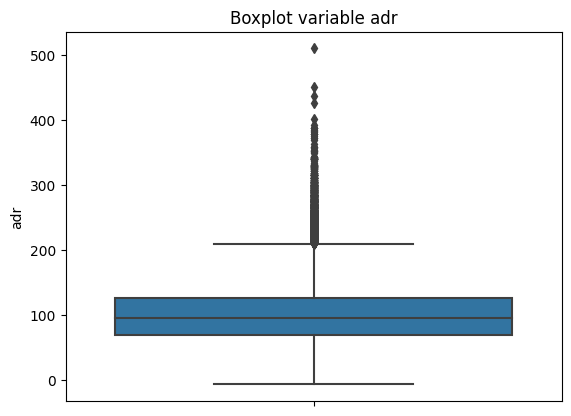

In [88]:
grf = sns.boxplot(y="adr", data=ds).set(title="Boxplot variable adr", ylabel="adr")
plt.show()

In [89]:
ds_atipico[ds_atipico["adr"] > 400]["adr"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5 entries, 8690 to 60071
Series name: adr
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


Como simplemente 5 valores de adr superan los 400 es probable que estos no nos esten aprotando mucha informacion y nos afecten en la deteccion de otros outliers multivariados.

* required_car_parking_spaces

In [90]:
ds[ds["required_car_parking_spaces"] > ds["adults"]]

hotel  lead_time  arrival_date_year arrival_date_month  \
8269   Resort Hotel        138               2017              March   
13713  Resort Hotel        205               2017               June   

       arrival_date_week_number  arrival_date_day_of_month  \
8269                         12                         19   
13713                        26                         26   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
8269                         2                     2       2       0.0   
13713                        3                    10       2       0.0   

       babies meal country market_segment distribution_channel  \
8269        0   HB     AUT         Direct            Corporate   
13713       0   BB     PRT         Direct               Direct   

       is_repeated_guest  previous_cancellations  \
8269                   1                       0   
13713                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
8269                                2                  E                  F   
13713                               0                  A                  A   

       booking_changes deposit_type  agent  days_in_waiting_list  \
8269                 1   No Deposit    9.0                   122   
13713                2   No Deposit  250.0                     0   

         customer_type    adr  required_car_parking_spaces  \
8269   Transient-Party   80.0                            8   
13713        Transient  111.0                            3   

       total_of_special_requests                                    id  \
8269                           0  174365a6-2548-48c4-ae12-7842d5498f12   
13713                          0  4267af65-0a89-4489-b099-e0332c6c51fe   

       is_canceled  
8269             0  
13713            0

Como no tiene sentido que haya mas vehiculos que adultos voy a borrar esas filas

In [91]:
indices = ds[ds["required_car_parking_spaces"] > ds["adults"]].index
ds.drop(indices, inplace=True)

* total_of_special_requests

Valores normales

# Analisis Multivariado

Para empezar el analisis multivariado vamos a comparar las variables:


*  *adr* y *days_in_waiting_list*


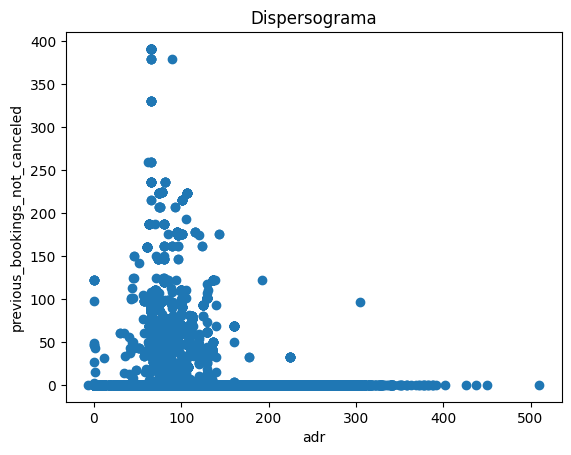

In [92]:
plt.scatter(ds.adr,ds.days_in_waiting_list)
plt.title('Dispersograma')
plt.xlabel('adr')
plt.ylabel('previous_bookings_not_canceled')
plt.show()

Vamos a intentar detectar outliers multivariados utilizando Isolation Forests.


In [93]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo = ds.loc[:, ['adr', 'previous_bookings_not_canceled']].copy()
pred= iforest.fit_predict(ds_nuevo)

#Almaceno scores y etiquetas
ds_nuevo['scores']=iforest.decision_function(ds_nuevo)
ds_nuevo['outlier_label']=pred

#Observaciones anómalas
ds_nuevo[ds_nuevo.outlier_label==-1]


/home/martinlaurito/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


adr  previous_bookings_not_canceled    scores  outlier_label
349     0.0                              17 -0.002747             -1
1579   70.0                              25 -0.001379             -1
1661   45.0                              25 -0.002682             -1
1882    0.0                              20 -0.011522             -1
3036    0.0                              15 -0.001349             -1
...     ...                             ...       ...            ...
53226  67.0                              26 -0.002884             -1
54728  30.0                              21 -0.006675             -1
54846  35.0                              25 -0.007279             -1
54997  65.0                              27 -0.003072             -1
56240  65.0                              64 -0.009534             -1

[61 rows x 4 columns]

In [94]:
#Cantidad de obs. anómalas
ds_nuevo.outlier_label.value_counts()

 1    61535
-1       61
Name: outlier_label, dtype: int64

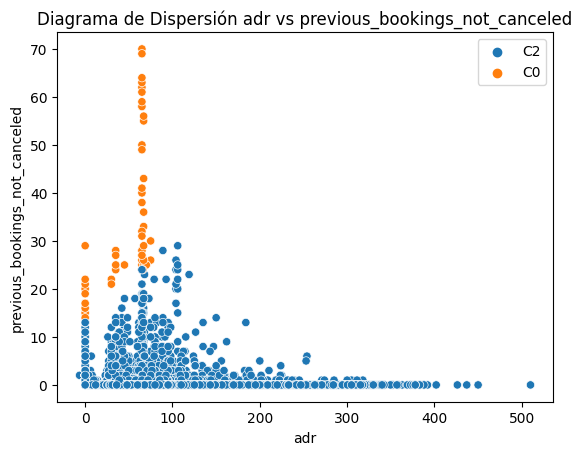

In [95]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo['adr'], y=ds_nuevo['previous_bookings_not_canceled'], hue=color)
plt.title('Diagrama de Dispersión adr vs previous_bookings_not_canceled')
plt.show()

* *adr* vs *previous_bookings_not_canceled*


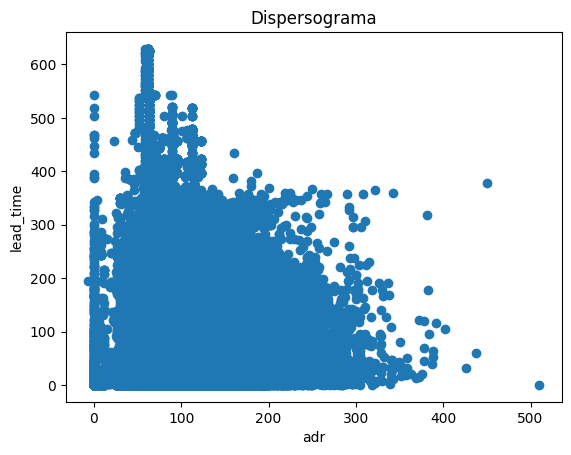

In [96]:
plt.scatter(ds.adr,ds.lead_time)
plt.title('Dispersograma')
plt.xlabel('adr')
plt.ylabel('lead_time')
plt.show()

In [97]:
iforest2 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.007, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_2 = ds.loc[:, ['adr', 'lead_time']].copy()
pred= iforest2.fit_predict(ds_nuevo_2)

#Almaceno scores y etiquetas
ds_nuevo_2['scores']=iforest2.decision_function(ds_nuevo_2)
ds_nuevo_2['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_2[ds_nuevo_2.outlier_label==-1]


/home/martinlaurito/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


adr  lead_time    scores  outlier_label
320    289.6        212 -0.022946             -1
426     90.0        521 -0.009253             -1
576     62.8        626 -0.021593             -1
684    340.0         47 -0.005314             -1
685     62.0        573 -0.005005             -1
...      ...        ...       ...            ...
61305   62.0        622 -0.015455             -1
61452  330.0          8 -0.013755             -1
61579   51.4        517 -0.011673             -1
61745  300.4        205 -0.023140             -1
61834  305.0         95 -0.007497             -1

[432 rows x 4 columns]

In [98]:
#Cantidad de obs. anómalas
ds_nuevo_2.outlier_label.value_counts()

 1    61164
-1      432
Name: outlier_label, dtype: int64

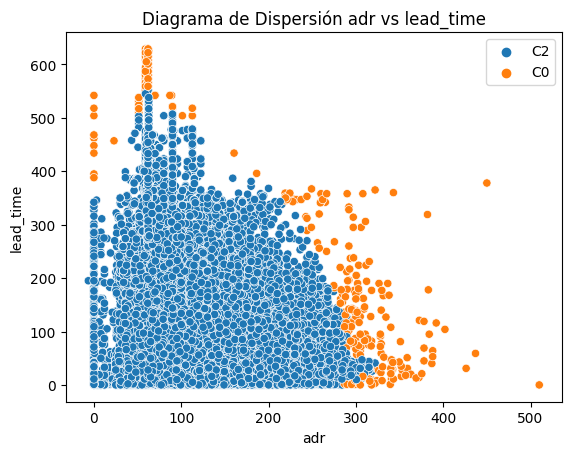

In [99]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_2['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_2['adr'], y=ds_nuevo_2['lead_time'], hue=color)
plt.title('Diagrama de Dispersión adr vs lead_time')
plt.show()

* *stays_in_week_nights* vs *previous_cancellations*

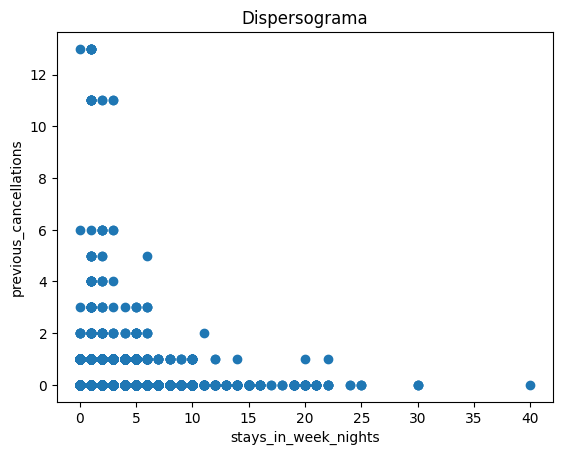

In [100]:
plt.scatter(ds.stays_in_week_nights,ds.previous_cancellations)
plt.title('Dispersograma')
plt.xlabel('stays_in_week_nights')
plt.ylabel('previous_cancellations')
plt.show()

In [101]:
iforest3 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_3 = ds.loc[:, ['stays_in_week_nights', 'previous_cancellations']].copy()
pred= iforest3.fit_predict(ds_nuevo_3)

#Almaceno scores y etiquetas
ds_nuevo_3['scores']=iforest3.decision_function(ds_nuevo_3)
ds_nuevo_3['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_3[ds_nuevo_3.outlier_label==-1]

/home/martinlaurito/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


stays_in_week_nights  previous_cancellations    scores  outlier_label
3855                     20                       0 -0.001339             -1
5295                     22                       0 -0.001607             -1
6423                     21                       0 -0.001607             -1
9229                     24                       0 -0.001607             -1
10127                    11                       2 -0.015129             -1
12477                    21                       0 -0.001607             -1
14236                    24                       0 -0.001607             -1
14877                    20                       0 -0.001339             -1
15728                    20                       0 -0.001339             -1
17868                     6                       3 -0.000941             -1
17990                     6                       3 -0.000941             -1
18282                    20                       0 -0.001339             -1
18683                    20                       0 -0.001339             -1
18816                    20                       0 -0.001339             -1
19788                     6                       3 -0.000941             -1
20153                    21                       0 -0.001607             -1
22511                    20                       0 -0.001339             -1
22599                    22                       1 -0.023056             -1
23808                    20                       0 -0.001339             -1
28372                     6                       5 -0.009361             -1
30395                    25                       0 -0.001607             -1
31310                    40                       0 -0.001875             -1
31408                    21                       0 -0.001607             -1
34040                    21                       0 -0.001607             -1
35632                    20                       0 -0.001339             -1
35851                    21                       0 -0.001607             -1
37204                    20                       0 -0.001339             -1
38440                    14                       1 -0.007890             -1
40633                    22                       0 -0.001607             -1
40800                    20                       0 -0.001339             -1
41206                    20                       0 -0.001339             -1
41852                    20                       0 -0.001339             -1
42234                    20                       1 -0.023056             -1
43265                    21                       0 -0.001607             -1
43667                    30                       0 -0.001875             -1
47054                    21                       0 -0.001607             -1
47601                    25                       0 -0.001607             -1
49831                    20                       0 -0.001339             -1
53537                    22                       0 -0.001607             -1
54391                    30                       0 -0.001875             -1
55252                    20                       0 -0.001339             -1
56096                    20                       0 -0.001339             -1
56338                    20                       0 -0.001339             -1
56508                    22                       0 -0.001607             -1
57428                    30                       0 -0.001875             -1
58278                    21                       0 -0.001607             -1
59100                    20                       0 -0.001339             -1
59231                    22                       0 -0.001607             -1
60483                    25                       0 -0.001607             -1
60607                    20                       0 -0.001339             -1
61043                    21                       0 -0.001607             -1

In [102]:
#Cantidad de obs. anómalas
ds_nuevo_3.outlier_label.value_counts()

 1    61545
-1       51
Name: outlier_label, dtype: int64

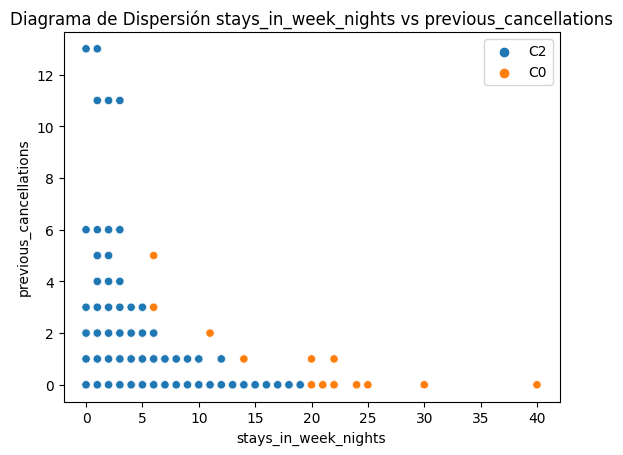

In [103]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_3['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_3['stays_in_week_nights'], y=ds_nuevo_3['previous_cancellations'], hue=color)
plt.title('Diagrama de Dispersión stays_in_week_nights vs previous_cancellations')
plt.show()

* *children* vs *adr*

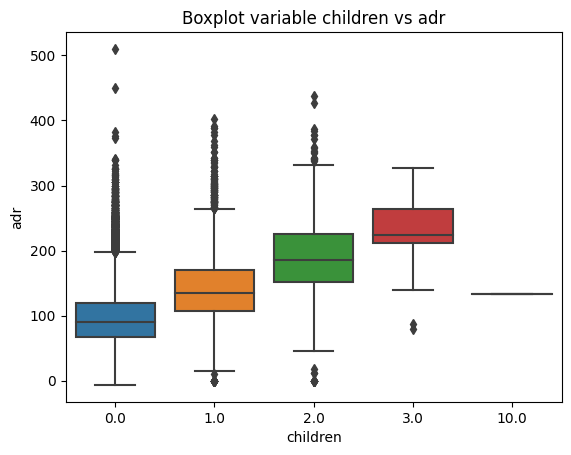

In [104]:
grf=sns.boxplot(y="adr",x="children" , data=ds).set(title="Boxplot variable children vs adr",xlabel="children",ylabel="adr")

In [105]:
iforest4 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.001, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_4 = ds.loc[:, ['adr', 'children']].copy()
print(ds_nuevo_4)
pred= iforest4.fit_predict(ds_nuevo_4)

#Almaceno scores y etiquetas
ds_nuevo_4['scores']=iforest4.decision_function(ds_nuevo_4)
ds_nuevo_4['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_4[ds_nuevo_4.outlier_label==-1]

          adr  children
0      115.50       0.0
1       42.00       0.0
2      229.00       2.0
3       75.00       0.0
4       75.00       0.0
...       ...       ...
61908   48.00       0.0
61909  149.00       0.0
61910   95.00       0.0
61911   36.05       0.0
61912  143.29       0.0

[61596 rows x 2 columns]


/home/martinlaurito/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


adr  children    scores  outlier_label
439    307.00       2.0 -0.001966             -1
1271   353.00       2.0 -0.008213             -1
1970   305.00       2.0 -0.000671             -1
3838   351.00       2.0 -0.008213             -1
5184   378.00       2.0 -0.009782             -1
...       ...       ...       ...            ...
55647  328.67       2.0 -0.005083             -1
57941  357.00       2.0 -0.008213             -1
59326  315.33       2.0 -0.005083             -1
61452  330.00       2.0 -0.005083             -1
61834  305.00       2.0 -0.000671             -1

[62 rows x 4 columns]

In [106]:
#Cantidad de obs. anómalas
ds_nuevo_4.outlier_label.value_counts()

 1    61534
-1       62
Name: outlier_label, dtype: int64

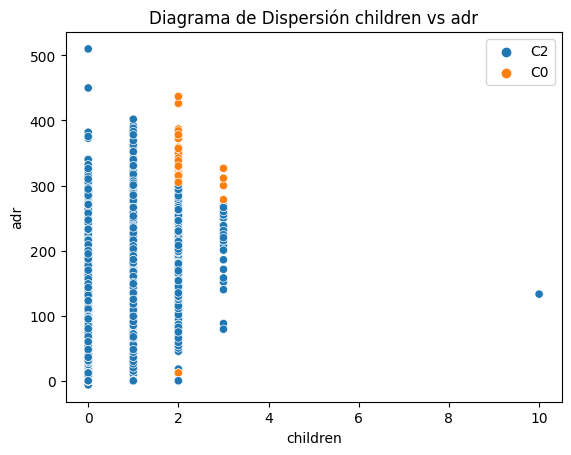

In [107]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_4['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_4['children'], y=ds_nuevo_4['adr'], hue=color)
plt.title('Diagrama de Dispersión children vs adr')
plt.show()

* *is_repeated_guest* vs *previous_booking_not_canceled*


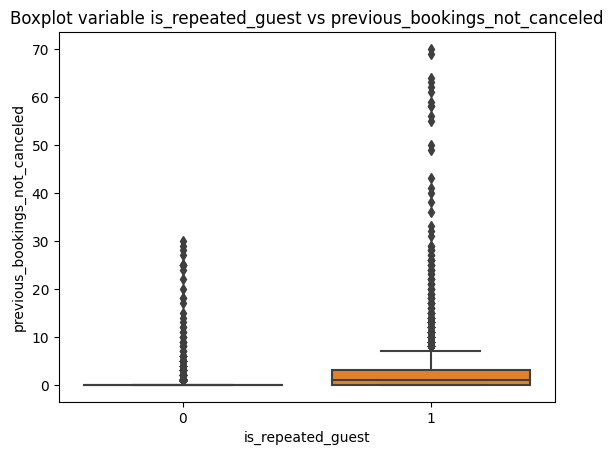

In [108]:
grf=sns.boxplot(y="previous_bookings_not_canceled",x="is_repeated_guest" , data=ds).set(title="Boxplot variable is_repeated_guest vs previous_bookings_not_canceled",xlabel="is_repeated_guest",ylabel="previous_bookings_not_canceled")

In [109]:
iforest5 = IsolationForest(n_estimators=200, max_samples='auto', 
                          contamination=0.0005, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_nuevo_5 = ds_hotels.loc[:, ['previous_bookings_not_canceled', 'is_repeated_guest']].copy()
print(ds_nuevo_5)
pred= iforest5.fit_predict(ds_nuevo_5)

#Almaceno scores y etiquetas
ds_nuevo_5['scores']=iforest5.decision_function(ds_nuevo_5)
ds_nuevo_5['outlier_label']=pred

#Observaciones anómalas
ds_nuevo_5[ds_nuevo_5.outlier_label==-1]
ds_nuevo_5.head()

       previous_bookings_not_canceled  is_repeated_guest
0                                   0                  0
1                                   0                  0
2                                   0                  0
3                                   0                  0
4                                   0                  0
...                               ...                ...
61908                               0                  0
61909                               0                  0
61910                               0                  0
61911                               0                  0
61912                               0                  0

[61913 rows x 2 columns]


/home/martinlaurito/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


previous_bookings_not_canceled  is_repeated_guest    scores  outlier_label
0                               0                  0  0.428099              1
1                               0                  0  0.428099              1
2                               0                  0  0.428099              1
3                               0                  0  0.428099              1
4                               0                  0  0.428099              1

In [110]:
#Cantidad de obs. anómalas
ds_nuevo_5.outlier_label.value_counts()

 1    61890
-1       23
Name: outlier_label, dtype: int64

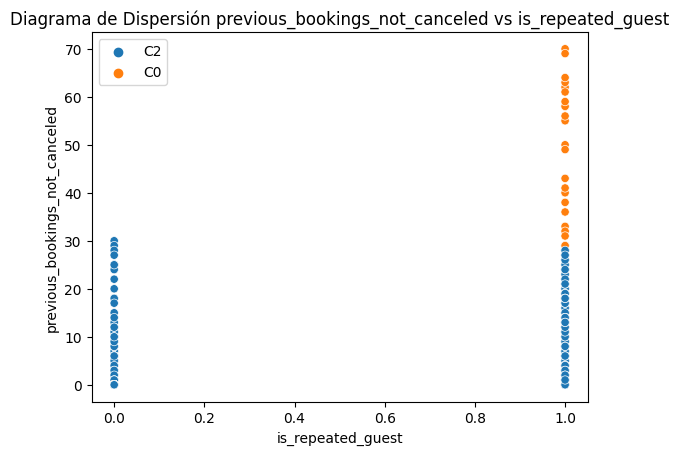

In [111]:
#Grafico dispersograma
color=[f"C{n+1}" for n in (ds_nuevo_5['outlier_label'].values)]

sns.scatterplot(x=ds_nuevo_5['is_repeated_guest'], y=ds_nuevo_5['previous_bookings_not_canceled'], hue=color)
plt.title('Diagrama de Dispersión previous_bookings_not_canceled vs is_repeated_guest')
plt.show()

Los Outliers encontrados previamente pueden ser eliminados del dataset para mejorar el analisis de datos.

In [114]:
print(ds.columns)

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')


In [118]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61596 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61596 non-null  object 
 1   lead_time                       61596 non-null  int64  
 2   arrival_date_year               61596 non-null  int64  
 3   arrival_date_month              61596 non-null  object 
 4   arrival_date_week_number        61596 non-null  int64  
 5   arrival_date_day_of_month       61596 non-null  int64  
 6   stays_in_weekend_nights         61596 non-null  int64  
 7   stays_in_week_nights            61596 non-null  int64  
 8   adults                          61596 non-null  int64  
 9   children                        61596 non-null  float64
 10  babies                          61596 non-null  int64  
 11  meal                            61596 non-null  object 
 12  country                         

In [115]:
ds.to_csv("hotels_modificado_train.csv")